

**THIS IS NOT THE COMPLETE TUTORIAL - see file with (MAIN) in the name. Paste all this code before the first Python block**

First you'll need to select which hardware setup you have. You'll need to select both a `SCOPETYPE` and a `PLATFORM`. `SCOPETYPE` can either be `'OPENADC'` for the CWLite/CW1200 or `'CWNANO'` for the CWNano. `PLATFORM` is the target device, with `'CWLITEARM'`/`'CW308_STM32F3'` being the best supported option, followed by `'CWLITEXMEGA'`/`'CW308_XMEGA'`, then by `'CWNANO'`. As of CW 5.4, you can select the SimpleSerial version
used. For example:

```python
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
SS_VER = 'SS_VER_2_1'
```

In [3]:
SCOPETYPE = 'OPENADC'
PLATFORM = 'CWLITEARM'
SS_VER = 'SS_VER_2_1'
#import os
#os.chdir('C:/Users/prith/ChipWhisperer5_64/cw/home/portable/chipwhisperer/jupyter/courses/sca101')

This code will connect the scope and do some basic setup. We're now just going to use a special setup script to do this. This script contains the commands we ran seperately before.

In [4]:
%run "../../Setup_Scripts/Setup_Generic.ipynb"

INFO: Found ChipWhisperer😍


The following code will build the firmware for the target.

In [5]:
import os
os.chdir('../../../hardware/victims/firmware/basic-NN')
print(os.listdir())
!make PLATFORM=CWLITEARM CRYPTO_TARGET=NONE SS_VER=SS_VER_2_1

['.comm_check.c.swp', '.dep', '.ipynb_checkpoints', 'basic-NN-CWLITEARM.bin', 'basic-NN-CWLITEARM.eep', 'basic-NN-CWLITEARM.elf', 'basic-NN-CWLITEARM.hex', 'basic-NN-CWLITEARM.lss', 'basic-NN-CWLITEARM.map', 'basic-NN-CWLITEARM.sym', 'basic-NN.c', 'comm_check.c', 'Correlation_plot.pdf', 'makefile', 'Makefile.inc', 'modified_mnist_test.csv', 'objdir-CWLITEARM']
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
make[1]: '.dep' is up to date.
SS_VER set to SS_VER_2_1
SS_VER set to SS_VER_2_1
.
Welcome to another exciting ChipWhisperer target build!!
arm-none-eabi-gcc (GNU Arm Embedded Toolchain 10-2020-q4-major) 10.2.1 20201103 (release)
Copyright (C) 2020 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

.
Compiling:
    basic-NN.c ...Done!
.
Compiling:
    .././simpleserial/simpleserial.c ...Done!
.
Compili

Finally, all that's left is to program the device, which can be done with the following line:

In [6]:
cw.program_target(scope, prog, "basic-NN-{}.hex".format(PLATFORM))

Detected known STMF32: STM32F302xB(C)/303xB(C)
Extended erase (0x44), this can take ten seconds or more
Attempting to program 37195 bytes at 0x8000000
STM32F Programming flash...
STM32F Reading flash...
Verified flash OK, 37195 bytes


To make interacting with the hardware easier, let's define a function to attempt a password and return a power trace:

In [53]:
# def cap_pass_trace(pass_guess):
#     reset_target(scope)
#     num_char = target.in_waiting()
#     while num_char > 0:
#         target.read(num_char, 10)
#         time.sleep(0.01)
#         num_char = target.in_waiting()

#     scope.arm()
#     target.write(pass_guess)
#     ret = scope.capture()
#     if ret:
#         print('Timeout happened during acquisition')

#     trace = scope.get_last_trace()
#     return trace

We also don't need all of the default 5000 samples in the trace. 3000 is a good starting point for most targets:

In [7]:
scope.adc.samples = 5000

In [8]:
f = open("modified_mnist_test.csv",'r')

c= 0
label = []
features_string = []
for line in f :
    if c >=1 :# and c<10 :
        features_label = line.split(",")
#        print(features)
        l = len(features_label)
        label.append(features_label[l-1].replace("\n",""))
        f_s = ""
        for i in range(0,l-1):
            f_s = f_s + features_label[i]
        features_string.append(f_s)
    c = c+ 1
    
print(features_string[1])
print(label[1])

0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111111000000000000000000000111111110000000000000000000111111111100000000000000000011100001110000000000000000001100001110000000000000000000000000111000000000000000000000000111100000000000000000000000011100000000000000000000000011110000000000000000000000011110000000000000000000000001110000000000000000000000001111000000000000000000000000111000000000000000000000000111100000000000000000000000111100000000000000000000000011100000000000000000000000001110000000000011110000000000111111111111111111100000000011111111111111111100000000000111111111110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
2


In [9]:
# scope.dis()
# target.dis()
#
# DEFINE THE cap_pass_trace() function - either using a hardware connection or the file read-out.
#
def cap_pass_trace(pass_guess):
    reset_target(scope)
    num_char = target.in_waiting()
    m = ""
    while num_char > 0:
        m = target.read(num_char, 10)
        time.sleep(0.1)
        num_char = target.in_waiting()
        #print(m)
    
#     print(target.read)
    scope.arm()
    target.write(pass_guess)
    ret = scope.capture()
    if ret:
        print('Timeout happened during acquisition')

    trace = scope.get_last_trace()
    return trace, m

#raise NotImplementedError("Add your code here, and delete this.")

trace_test,m = cap_pass_trace(features_string[1]+"\n")

print(m)
#Basic sanity check
assert(len(trace_test) == 5000)
print("✔️ OK to continue!")

  
✔️ OK to continue!


#### Communication Check

In [46]:
def cap_pass_trace(pass_guess):
    reset_target(scope)
    scope.arm()
    target.write(pass_guess)
    time.sleep(1)
    target.write(pass_guess[1:])
    time.sleep(1)
    num_char = target.in_waiting()
    m = ""
    while num_char > 0:
        m = target.read(num_char, 10)
        time.sleep(0.1)
        num_char = target.in_waiting()
        #print(m)
    
#     print(target.read)
   
    ret = scope.capture()
    if ret:
        print('Timeout happened during acquisition')

    trace = scope.get_last_trace()
    return trace, m

#raise NotImplementedError("Add your code here, and delete this.")
trace_test,m = cap_pass_trace("SHelloWorld"+"\n")

print(m)
print("✔️ OK to continue!")

 Waiting for 'S' command...
Received 'S' command. Waiting for data...
Received data: HHelloWor
Sending data back to PC: HHelloWor

✔️ OK to continue!


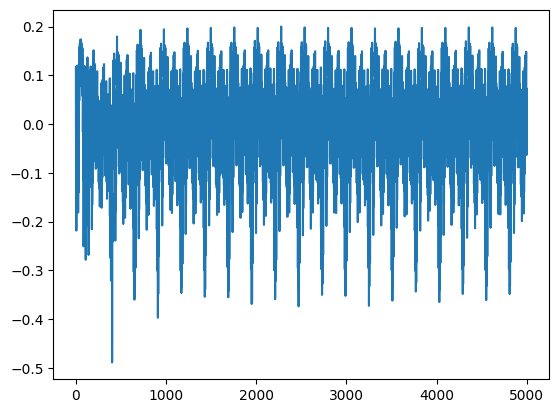

In [10]:
import matplotlib.pyplot as plt
plt.plot(trace_test);

In [11]:
trace_list = []
pred_list = []
print(len(label))
for i in range(0,100) :
    print(i)
    trace_h,m = cap_pass_trace(features_string[i]+"\n")
    time.sleep(2)
    trace_list.append(trace_h)
    pred_list.append(m)

print(pred_list)
# print(features_label[0:11])
    

10000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
['2\x83\x0e\xad\x00', '7\x83\x0e\xadâ@*ÀóíeÁátº¿¬®q@Ñ\x1b¹À\x93¬ó¿\x07º4Á7g\x13A¿\x9dÄ¿2\x8cô?00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '2\x83\x0e\xad\x00', '1\x83\x0e\xadSDÕÀ\x81\x9a¤@7l_?ä\x0f\x8c¿wDNÀ\r\x15\x1aÀ¼\x8dÃ¿\x9d~Ö¿\x86@7>^º3À00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000000', '0\x83\x0e\xad\xad\x05\x0eA>ÿ{ÁAà\x97¿*Ï$À<8\x16Áñ"9¿È{É¿öa\x11Àâ\x19\x0eÀY@ À00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [12]:
pred_list[0][0]
l = len(pred_list)
c = 0
for i in range(1,len(pred_list)) :
    if pred_list[i][0] == label[i-1] :
        c = c+1
print(f"Accuracy {float(c/l)}")

Accuracy 0.96


In [13]:
all_sum = {}
all_sum[0] = []
all_sum[1] = []
all_sum[2] = []
all_sum[3] = []
all_sum[4] = []
all_sum[5] = []
all_sum[6] = []
all_sum[7] = []
all_sum[8] = []
all_sum[9] = []

nos_of_0 = 0
avg_0 = []
for i in range(0,len(pred_list)) :
    all_sum[int(pred_list[i][0])].append(trace_list[i])

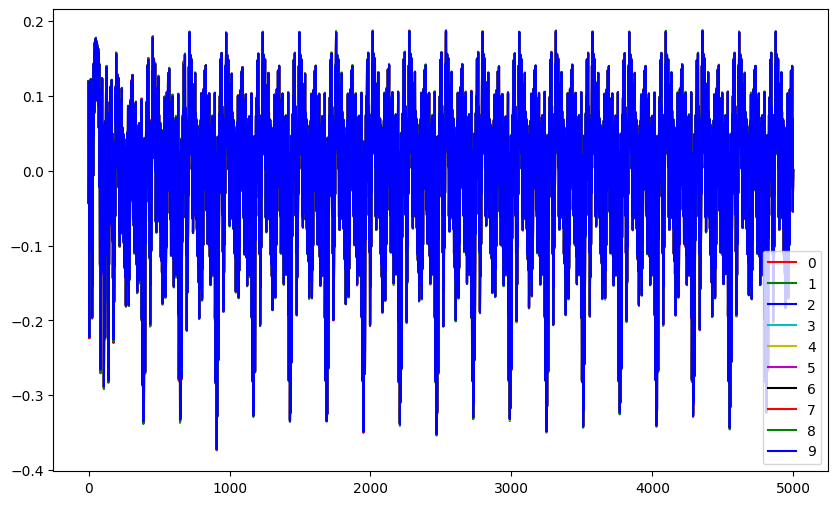

In [14]:
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

color=['r','g','b','c','y','m','k','r','g','b']
plt.figure(figsize=(10,6))
for i in range(10):
    plt.plot(np.mean(np.array(all_sum[i]), axis=0), label = i, c=color[i])

plt.legend()
plt.show()

In [15]:
Average_across_samples = {}
for i in range(10):
    Average_across_samples[i] = np.mean(np.array(all_sum[i]))
print('Average power: ',Average_across_samples)

# Sorting the dictionary by values
sorted_dict = dict(sorted(Average_across_samples.items(), key=lambda item: abs(item[1])))

print("Sorted average power:", sorted_dict)

Average power:  {0: -0.007927191840277778, 1: -0.007983942522321428, 2: -0.0078702880859375, 3: -0.007965201822916667, 4: -0.007986568509615384, 5: -0.007976725260416666, 6: -0.0079568359375, 7: -0.007966783854166666, 8: -0.007942578125, 9: -0.00793763671875}
Sorted average power: {2: -0.0078702880859375, 0: -0.007927191840277778, 9: -0.00793763671875, 8: -0.007942578125, 6: -0.0079568359375, 3: -0.007965201822916667, 7: -0.007966783854166666, 5: -0.007976725260416666, 1: -0.007983942522321428, 4: -0.007986568509615384}


In [16]:
hamming_weights = []
average_power = []
for i in range(0,100):
    hamming_weights.append(features_string[i].count('1'))
    #average_power.append(sum(abs(x) for x in trace_list[i]) / len(trace_list[i]))
    average_power.append(np.mean(trace_list[i]))

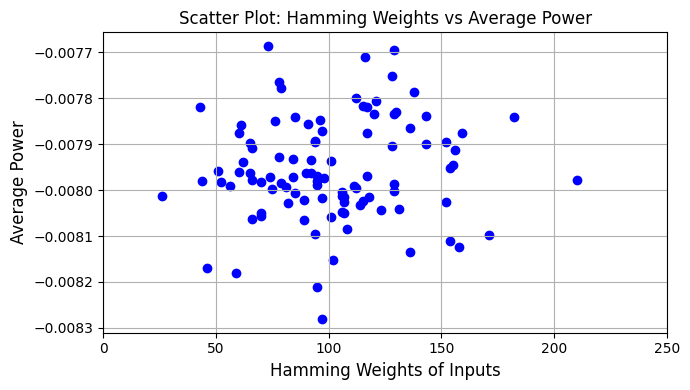

In [17]:
# Create a scatter plot
plt.figure(figsize=(7,4))
plt.scatter(hamming_weights, average_power, color='blue', marker='o')

# Add labels and title
plt.xlabel('Hamming Weights of Inputs', fontsize=12)
plt.ylabel('Average Power', fontsize=12)
plt.title('Scatter Plot: Hamming Weights vs Average Power', fontsize=12)
plt.xticks([0, 50, 100, 150, 200, 250])
# Show the plot
plt.grid(True)
plt.tight_layout()
plt.savefig('Correlation_plot.pdf')
plt.show()

In [18]:
import numpy as np
trace_list = np.array(trace_list)
hamming_weights = np.array(hamming_weights)

In [25]:
import numpy as np
from scipy.stats import pearsonr

# Define the range of possible weight guesses
weight_guesses = np.linspace(-1, 1, 10000)  # Adjust the range and resolution as needed

# Perform correlation power analysis (CPA)
def cpa(trace_list, hamming_weights, weight_guesses):
    num_samples, num_points = trace_list.shape
    num_guesses = len(weight_guesses)
    correlations = np.zeros((num_guesses, num_points))

    for guess_idx, weight_guess in enumerate(weight_guesses):
        # Hypothetical power consumption
        # Introduce randomness in the hypothetical power consumption
        hypothetical_consumption = hamming_weights * weight_guess + np.random.normal(-1, 1, hamming_weights.shape)

        for point in range(num_points):
            trace_point_values = trace_list[:, point]
            correlation, _ = pearsonr(trace_point_values, hypothetical_consumption)
            correlations[guess_idx, point] = correlation

    return correlations

# Calculate correlations
correlations = cpa(trace_list, hamming_weights, weight_guesses)

# Find the weight guess and point with the highest correlation
max_correlation_index = np.unravel_index(np.argmax(correlations), correlations.shape)
best_weight_guess = weight_guesses[max_correlation_index[0]]
max_correlation_value = correlations[max_correlation_index]

print(f"Maximum correlation is at weight guess {best_weight_guess} with value {max_correlation_value}")

# Identify the layer and weight index
predicted_weight_layer = "Dense layer 1"
predicted_weight_index = max_correlation_index[1] % 100  # Assuming we are predicting weights of the first layer (100 weights)

print(f"Predicted weight index: {predicted_weight_index}")
print(f"Predicted weight belongs to: {predicted_weight_layer}")
print(f"Predicted value of the weight: {best_weight_guess}")


Maximum correlation is at weight guess -0.03430343034303429 with value 0.4307086137632847
Predicted weight index: 24
Predicted weight belongs to: Dense layer 1
Predicted value of the weight: -0.03430343034303429


All Weights used and find the best match.

In [40]:
# Identify the layer and weight index
predicted_weight_layer = "Dense layer 1"
predicted_weight_index = max_correlation_index[1] % 784*10 # Assuming we are predicting weights of the first layer (20 weights)

print(f"Predicted weight index: {predicted_weight_index}")
print(f"Predicted weight belongs to: {predicted_weight_layer}")
print(f"Predicted value of the weight: {best_weight_guess}")

Predicted weight index: 2200
Predicted weight belongs to: Dense layer 1
Predicted value of the weight: -0.03430343034303429


In [45]:
All_weights = [0.074472, -0.032442, 0.058071, -0.039095, -0.085675, 0.086464, 0.076499, -0.057432, 0.042632, -0.007808, 0.012774, -0.066301, 0.046140, -0.010991, -0.084025, 0.020482, -0.023292, -0.070337, -0.047515, 0.008182, -0.022063, -0.078732, 0.033292, 0.028360, 0.069928, -0.002116, -0.036472, 0.035403, -0.079712, -0.050473, 0.015439, 0.011622, -0.050135, -0.075119, 0.057842, 0.040671, -0.021296, 0.033466, -0.041533, 0.033118, 0.189601, 0.103135, -0.045964, 0.140680, 0.097834, 0.135098, -0.124131, -0.086921, -0.083550, -0.147417, -0.015751, -0.033112, -0.063459, -0.076885, -0.078988, -0.077345, 0.002886, -0.054440, 0.020290, 0.136973, 0.065625, -0.086546, -0.165058, -0.121682, -0.283287, -0.390538, -0.341775, -0.273662, -0.168104, -0.449058, -0.526288, -0.562116, -0.341480, -0.475586, -0.406405, -0.419029, -0.403272, -0.283036, -0.115566, -0.123006, 0.006008, -0.022465, 0.055574, -0.085178, 0.073043, 0.013890, 0.006550, 0.126367, 0.052067, -0.212489, -0.250203, -0.226157, -0.169264, -0.131276, -0.243742, -0.058312, -0.184694, -0.102325, -0.185691, -0.105244, -0.156629, -0.134094, -0.338549, -0.419273, -0.394619, -0.603923, -0.435399, -0.159499, -0.037441, 0.037068, -0.073036, -0.036911, -0.029960, 0.009936, -0.112372, 0.072630, -0.250571, -0.429031, -0.226746, -0.153721, 0.000542, -0.060116, 0.010609, 0.071229, -0.082585, -0.023155, -0.038479, 0.009910, -0.027517, -0.027432, -0.007864, -0.101954, -0.169212, -0.174007, -0.112729, -0.237202, -0.211669, -0.166622, -0.248338, 0.018068, 0.006000, -0.056852, -0.144540, -0.048828, -0.329845, -0.260094, -0.129860, -0.119836, -0.081475, -0.122084, -0.028906, 0.079745, -0.026619, 0.142695, 0.127148, 0.135567, 0.046575, 0.186809, 0.150121, 0.028879, -0.007975, -0.079224, -0.097144, -0.211983, -0.327876, -0.526349, -0.373830, -0.152284, 0.003314, 0.029201, -0.160441, -0.179831, -0.375759, -0.098884, 0.024012, -0.019170, -0.054321, -0.194424, -0.037620, -0.037368, 0.021300, 0.125241, 0.055266, 0.066931, 0.146313, 0.217173, 0.145898, 0.199311, 0.022235, 0.179937, 0.185614, -0.090170, -0.555052, -0.815492, -0.502483, -0.239556, -0.038634, -0.150907, -0.131854, -0.154367, -0.463093, 0.007373, -0.014140, -0.070338, -0.208438, -0.010492, 0.002515, -0.060708, -0.011448, 0.087228, -0.010752, 0.116941, 0.132998, 0.229234, 0.161976, 0.182686, 0.043829, -0.005780, 0.114096, 0.084226, -0.193084, -0.649870, -0.534334, -0.199918, 0.063503, -0.123608, -0.023738, -0.143882, -0.255098, -0.170000, -0.002757, -0.085227, -0.185887, -0.007193, -0.019779, 0.036170, 0.067744, 0.047318, 0.117147, 0.057001, 0.266262, 0.203907, 0.305432, 0.058251, -0.006267, 0.023546, 0.149048, 0.201846, -0.047776, -0.767779, -0.716250, -0.360664, -0.034501, -0.048530, 0.104367, -0.197445, -0.223921, -0.155452, -0.111673, -0.068662, -0.061554, -0.015299, -0.030562, -0.044980, 0.016038, 0.176982, 0.114598, -0.001705, 0.116045, 0.248414, 0.222030, 0.272281, 0.135408, 0.001940, -0.019652, 0.109078, 0.054987, -0.978416, -0.698608, -0.247961, 0.029075, 0.041728, 0.090924, -0.033026, -0.203575, -0.032203, -0.126481, -0.089182, -0.013733, -0.069270, -0.066334, 0.084874, 0.009836, 0.022965, -0.035983, -0.169870, -0.043907, 0.111706, 0.177400, 0.118361, 0.115978, 0.184989, 0.089833, 0.223545, -0.000498, -0.816501, -0.455194, -0.121314, -0.040257, -0.076255, 0.003942, -0.058904, -0.212945, -0.215724, 0.051163, 0.067340, 0.056142, -0.129425, -0.037839, -0.065254, -0.001238, -0.199153, -0.359568, -0.446634, -0.371652, -0.182631, 0.011643, 0.084402, 0.121300, 0.144543, 0.279975, 0.130173, 0.209434, -0.576244, -0.543669, -0.080311, 0.010914, 0.003035, -0.101359, -0.107268, -0.194053, -0.096022, 0.010250, 0.108086, 0.054271, -0.030969, 0.063197, 0.022914, 0.050547, -0.158737, -0.572837, -0.607614, -0.505343, -0.251508, -0.113601, -0.046748, 0.089022, 0.162262, 0.167834, 0.324742, 0.327567, -0.010207, -0.376210, 0.002775, -0.004718, 0.074553, -0.033675, -0.049521, -0.100451, 0.035031, 0.167946, 0.094678, 0.142101, 0.044260, 0.058883, 0.060064, 0.010477, -0.381935, -0.499021, -0.666480, -0.441958, -0.203893, -0.045383, -0.128914, -0.134600, 0.052637, 0.163457, 0.280996, 0.263211, 0.131743, -0.152938, -0.043204, -0.154222, -0.100892, -0.120396, -0.243370, -0.073214, 0.127412, 0.145600, 0.152717, 0.143245, 0.187196, 0.085005, 0.148810, -0.091955, -0.281990, -0.648219, -0.637713, -0.534141, -0.224212, -0.151565, -0.073388, 0.054376, 0.176706, 0.049531, 0.304583, 0.276764, -0.023418, -0.219305, -0.060296, -0.012712, -0.072998, -0.200120, -0.264898, -0.047963, 0.142925, 0.118171, 0.278058, 0.137685, 0.116243, 0.283016, -0.017170, -0.153167, -0.401120, -0.685651, -0.530453, -0.444999, -0.219169, -0.092283, -0.013908, 0.060481, 0.026636, 0.139784, 0.188731, 0.230621, -0.152302, -0.353934, -0.078428, -0.077177, 0.046901, -0.152832, -0.345114, -0.018674, 0.194614, 0.174891, 0.164115, 0.272319, 0.189890, 0.287309, 0.058091, -0.223230, -0.626355, -0.484265, -0.467275, -0.339403, -0.122566, 0.091168, 0.043859, 0.042434, 0.037182, 0.109444, 0.215952, -0.025625, -0.186169, -0.371194, 0.205945, -0.002976, 0.000536, -0.189283, -0.185954, 0.013393, 0.128017, 0.105151, 0.107710, 0.136830, 0.306745, 0.222245, 0.032924, -0.248289, -0.583168, -0.555319, -0.352192, -0.125195, 0.063561, -0.060119, 0.072309, 0.062724, 0.126823, 0.115185, -0.034878, -0.043437, -0.266994, -0.310531, 0.050956, 0.065899, -0.062533, -0.270644, -0.306815, -0.120048, 0.074986, 0.095051, 0.084224, 0.044386, 0.192888, 0.229471, 0.020021, -0.272011, -0.364668, -0.407040, -0.138197, -0.149072, 0.022613, -0.051895, -0.022787, -0.007733, 0.052551, 0.085870, -0.064002, -0.048092, -0.216110, -0.291103, -0.248176, -0.023996, 0.137207, -0.069441, -0.349176, -0.130948, -0.003247, 0.105523, -0.005035, 0.119227, 0.081520, 0.274172, 0.172702, 0.079833, -0.182558, -0.203570, -0.153707, -0.089585, -0.008087, -0.083299, -0.048581, 0.010805, 0.040348, 0.038542, -0.022674, -0.000911, -0.391827, -0.282348, -0.110801, -0.073710, 0.168388, -0.009381, -0.260497, -0.121587, -0.047246, -0.003916, 0.015421, 0.103146, -0.008529, 0.310370, 0.232762, 0.207455, 0.146652, -0.015704, 0.020947, -0.052392, -0.058978, -0.059171, -0.168727, -0.152870, -0.030741, 0.025543, -0.198684, -0.238778, -0.355548, -0.076635, 0.030443, -0.055546, -0.096183, -0.221587, -0.130949, -0.204522, 0.070743, 0.038064, 0.033452, 0.053319, 0.012958, 0.238760, 0.242856, 0.192108, 0.116873, 0.043241, 0.079136, -0.093734, -0.125725, -0.141255, -0.113121, -0.127595, -0.057611, -0.064399, -0.160027, -0.161599, -0.337418, 0.193756, 0.105888, -0.037419, -0.000017, -0.238839, -0.264563, -0.398098, 0.066230, 0.127590, 0.068013, 0.107595, 0.132543, 0.036330, 0.199222, 0.222883, 0.175606, 0.128899, 0.064032, -0.022366, 0.012364, -0.107513, -0.111820, -0.176019, -0.102337, 0.041800, -0.104043, -0.273819, -0.158623, 0.200611, -0.032294, -0.046506, -0.065320, -0.124567, -0.335759, -0.423002, -0.184276, 0.044659, 0.105654, 0.096548, 0.158825, 0.144305, 0.245067, 0.282313, 0.173297, 0.113750, 0.176606, 0.035460, -0.043073, -0.178845, -0.320150, -0.233583, -0.233959, -0.148223, -0.133432, -0.331162, -0.097039, -0.186388, -0.005126, 0.032912, 0.002308, -0.117382, -0.122271, -0.231409, -0.180977, -0.179461, -0.281426, -0.150627, -0.088113, -0.140957, 0.001453, 0.091147, 0.119302, 0.050980, -0.001125, -0.159058, -0.099598, -0.273639, -0.421408, -0.528948, -0.455227, -0.319549, -0.478871, -0.223233, -0.023265, 0.010487, 0.046565, -0.014693, 0.072470, 0.033472, 0.029060, -0.279810, -0.387935, -0.436756, -0.401272, -0.536806, -0.513126, -0.662513, -0.428224, -0.523897, -0.505035, -0.670205, -0.690554, -0.554898, -0.571780, -0.549453, -0.453941, -0.415564, -0.460474, -0.360271, -0.345367, -0.255259, -0.028931, 0.042645, 0.014391, 0.052018, 0.075208, -0.056380, -0.078428, -0.131818, -0.066312, -0.349832, -0.344568, -0.426537, -0.441796, -0.434236, -0.383205, -0.247884, -0.417271, -0.468585, -0.414745, -0.461193, -0.441773, -0.446142, -0.125206, -0.241569, -0.328454, -0.171034, -0.158073, 0.019885, -0.066336, 0.043066, -0.018845, -0.019731, 0.026458, -0.083352, 0.062675, -0.101807, -0.025251, 0.004074, -0.039003, -0.132879, -0.009573, -0.112361, -0.207724, -0.115754, -0.197897, -0.260773, -0.157429, -0.137559, -0.123292, -0.047172, -0.091310, -0.150734, -0.141676, -0.099525, -0.245000, 0.067500, 0.033941, -0.017734, 0.032514,
    -0.067762, -0.076331, -0.084669, -0.005780, 0.003614, 0.049673, -0.073021, -0.040134, 0.023477, 0.032840, 0.042318, -0.070712, -0.065361, -0.003154, -0.089753, -0.086384, 0.064845, 0.060440, -0.083342, -0.033980, 0.001370, 0.056214, -0.037772, 0.024270, -0.018663, -0.032004, 0.079492, 0.085346, 0.050346, 0.044973, 0.041096, -0.016151, -0.073938, -0.064186, -0.074865, -0.127319, -0.217433, -0.182175, -0.135418, -0.110920, -0.008058, -0.035210, 0.123047, 0.177491, -0.252489, -0.355794, 0.011513, -0.018761, -0.067577, -0.040498, -0.084131, 0.051138, -0.072845, -0.051597, 0.027556, -0.072048, 0.038790, 0.071995, 0.001928, 0.026072, -0.107969, -0.104291, -0.081645, -0.120599, -0.365560, -0.243027, -0.381881, -0.312357, -0.019524, 0.112567, 0.053823, 0.342190, 0.205871, 0.041195, -0.037415, -0.131636, -0.088312, -0.302021, -0.144763, -0.212130, -0.127079, -0.037002, -0.044317, 0.061046, 0.030955, -0.038838, -0.013777, 0.048133, 0.050507, -0.197065, -0.183966, -0.312141, -0.551708, -0.490587, -0.528223, -0.419970, -0.168973, -0.118212, -0.134420, -0.101040, 0.040578, -0.159776, -0.305829, -0.268363, -0.297085, -0.374059, -0.504977, -0.510039, -0.406940, -0.218870, -0.158513, 0.085455, -0.018123, -0.000219, -0.030541, -0.130511, -0.110433, -0.076377, -0.278036, -0.228021, -0.015590, -0.068532, -0.079735, -0.128662, -0.053991, 0.089884, 0.043197, 0.070912, 0.030905, -0.126750, -0.067725, 0.035659, 0.145078, 0.021911, 0.072971, 0.033989, -0.361011, -0.474806, -0.355631, -0.131752, 0.079717, -0.003038, 0.081178, -0.012184, -0.004971, 0.086805, 0.091405, -0.226731, -0.183625, -0.149955, -0.123653, -0.282010, -0.072717, 0.074629, -0.087245, 0.034488, -0.084950, -0.100849, -0.013455, -0.049300, 0.077770, 0.180327, 0.081591, 0.041450, -0.083760, -0.520484, -0.376263, -0.098794, -0.044391, -0.043090, -0.193995, -0.100081, 0.019590, -0.120271, -0.146714, -0.296642, -0.411407, -0.348604, -0.281972, -0.101518, -0.236362, -0.179176, -0.096332, -0.202763, -0.328931, -0.250515, -0.044929, -0.015558, 0.029818, 0.078411, 0.032674, -0.031126, -0.143858, -0.722099, -0.271643, -0.193340, 0.077462, -0.124210, -0.162773, -0.252012, 0.025651, -0.257458, -0.353207, -0.280118, -0.310883, -0.304910, -0.269670, -0.146001, -0.046268, -0.243322, -0.128054, -0.222363, -0.209808, -0.221812, -0.069925, 0.017327, 0.080682, -0.100232, -0.093764, -0.160780, -0.549748, -0.620758, -0.280328, -0.144336, -0.049675, -0.116333, -0.242604, -0.134293, -0.059970, -0.304715, -0.238731, -0.247328, -0.363855, -0.394801, -0.320353, -0.103678, -0.135109, 0.016330, -0.008650, 0.050704, -0.137380, -0.039489, 0.030122, -0.151583, -0.159540, -0.141597, -0.185576, -0.518559, -0.783571, -0.682336, -0.320866, -0.234305, -0.088060, -0.088508, -0.203924, -0.047640, -0.051592, -0.340623, -0.176154, -0.201818, -0.168792, -0.199754, -0.201218, -0.140869, -0.057941, 0.095238, 0.197973, 0.357191, 0.247702, 0.024929, -0.072115, -0.109469, -0.251368, -0.243619, -0.367105, -0.577309, -0.690428, -0.660520, -0.387267, -0.084866, -0.019461, 0.036179, -0.123774, -0.292147, -0.157514, -0.423094, -0.357724, -0.232156, -0.174096, -0.210608, -0.057240, -0.104348, -0.073554, 0.252961, 0.350355, 0.416411, 0.298102, 0.047989, -0.170692, -0.146371, -0.178126, -0.313816, -0.403663, -0.555822, -0.837270, -0.308259, -0.263573, 0.058431, -0.056013, -0.000453, 0.023735, -0.170869, -0.048001, -0.268813, -0.372902, -0.232889, -0.108350, -0.137057, -0.126058, -0.153459, -0.159029, 0.291778, 0.515870, 0.531747, 0.217469, -0.053569, -0.127299, -0.132525, -0.178129, -0.197647, -0.253257, -0.228835, -0.629446, -0.187430, -0.220293, 0.203098, 0.068000, -0.013682, -0.106882, -0.025278, 0.156542, -0.241317, 0.002548, -0.045431, -0.080122, -0.150210, -0.261711, -0.318643, -0.119181, 0.289902, 0.541548, 0.444392, 0.078224, -0.059188, 0.011235, -0.185430, -0.221988, -0.122845, -0.028367, -0.044632, -0.275415, -0.342675, -0.273013, 0.088135, 0.123876, -0.108682, -0.227894, 0.119220, 0.042926, -0.176644, -0.080093, -0.085208, -0.100419, -0.163295, -0.372373, -0.422641, -0.269897, 0.280826, 0.433874, 0.379075, 0.059054, 0.016542, -0.222597, -0.253125, -0.251115, -0.161262, -0.154468, -0.238240, -0.405893, -0.346141, -0.125663, 0.021698, -0.099486, -0.110656, 0.082441, 0.184428, 0.118143, -0.063387, -0.110904, -0.179050, -0.018153, -0.147424, -0.438804, -0.377797, -0.150086, 0.344234, 0.431621, 0.389682, -0.030161, -0.134134, -0.360664, -0.353165, -0.235293, -0.169407, -0.220724, -0.154636, -0.081486, -0.221243, -0.116299, 0.046986, -0.028530, -0.034212, 0.145241, 0.184161, -0.029825, -0.365604, -0.430658, -0.164629, -0.123316, -0.220213, -0.362509, -0.238259, 0.116171, 0.382010, 0.501718, 0.234670, -0.089107, -0.342393, -0.457763, -0.370828, -0.382185, -0.312211, -0.279759, -0.381263, -0.355909, -0.410778, -0.189173, -0.207761, -0.085110, 0.038392, 0.106444, -0.159681, -0.236998, -0.305365, -0.429105, -0.251212, -0.175416, -0.154301, -0.077844, -0.199879, 0.038187, 0.271572, 0.464486, 0.152702, -0.261378, -0.490197, -0.445482, -0.387709, -0.276962, -0.241358, -0.306797, -0.215865, -0.141762, -0.231484, -0.095772, -0.078488, 0.055905, 0.134658, -0.021503, -0.117447, -0.214127, -0.336779, -0.526371, -0.339531, -0.154834, -0.059937, -0.111679, -0.152787, 0.005327, 0.315097, 0.288417, -0.033528, -0.363205, -0.508195, -0.279820, -0.191290, -0.218193, -0.151807, -0.124241, -0.047984, -0.121064, -0.246416, -0.154682, -0.252821, -0.034108, 0.031080, -0.083631, -0.231133, -0.364587, -0.582418, -0.572210, -0.406979, -0.197654, -0.055006, -0.062935, -0.132484, 0.035858, 0.274334, 0.171607, -0.116948, -0.333671, -0.198771, -0.210107, -0.044598, -0.016468, -0.040315, -0.213611, -0.101955, -0.063669, 0.010168, -0.067415, 0.230740, 0.045494, 0.038278, -0.141079, -0.291072, -0.357867, -0.615087, -0.388434, -0.101957, -0.016423, -0.002771, -0.021127, 0.019797, 0.015698, 0.089775, 0.100600, 0.039907, -0.052975, -0.017078, 0.002336, 0.041973, 0.063757, 0.005944, -0.039518, 0.059255, 0.013291, 0.004245, -0.018985, 0.218663, 0.044957, -0.085872, -0.259939, -0.171401, -0.146617, -0.389508, -0.188114, -0.091488, 0.086603, -0.009057, 0.114810, 0.106696, 0.069851, -0.036889, 0.060071, -0.061930, 0.055965, 0.134087, 0.243401, 0.167888, 0.000687, 0.019950, -0.190595, -0.049085, 0.005943, 0.121666, 0.062669, -0.090756, 0.077231, -0.067149, -0.177405, 0.076700, -0.123756, 0.094886, 0.052556, 0.050793, 0.050330, 0.098663, 0.055463, -0.096153, -0.110118, -0.167274, -0.069728, 0.063125, 0.107672, 0.178281, 0.060905, 0.120567, 0.166095, 0.129914, -0.177824, -0.081130, 0.117939, 0.063865, -0.135144, -0.042408, 0.187739, 0.016193, -0.067321, 0.082565, 0.041126, 0.374079, 0.215823, 0.078191, 0.099896, 0.007671, -0.047273, -0.295205, -0.350285, -0.336951, -0.126797, 0.007915, 0.137015, 0.187939, 0.239329, 0.117043, 0.102385, -0.054860, -0.294348, -0.203158, -0.021152, 0.129630, 0.235113, -0.008845, -0.003679, -0.063195, -0.140075, -0.238271, -0.165255, 0.292401, 0.363407, 0.071022, -0.017429, -0.002307, -0.069638, -0.235237, -0.162764, -0.209513, -0.124693, -0.029736, 0.128262, 0.272402, 0.114071, 0.078183, -0.057069, -0.231883, -0.468755, -0.389237, -0.190659, -0.023045, 0.243682, -0.019681, 0.026038, 0.014601, -0.064774, -0.271166, -0.240777, 0.085763, -0.003344, -0.170564, -0.258125, -0.126212, -0.258468, -0.224069, -0.219599, -0.324589, -0.277409, -0.221602, -0.276838, 0.008377, 0.020507, 0.055850, -0.072285, -0.145190, -0.240071, -0.354093, -0.215489, 0.184581, 0.102965, -0.005486, -0.055494, -0.045589, -0.075298, -0.297506, -0.486315, -0.564940, -0.341832, -0.540072, -0.337450, -0.469411, -0.716920, -0.659743, -0.423149, -0.456258, -0.497628, -0.634623, -0.776227, -0.660419, -0.655839, -0.439015, -0.430461, -0.272092, -0.124047, -0.185320, -0.110378, -0.059701, -0.040566, 0.025477, -0.012642, -0.025261, 0.049043, -0.213853, -0.093802, -0.282842, -0.312000, -0.310962, -0.343213, -0.386121, -0.383883, -0.535621, -0.548794, -0.618186, -0.504305, -0.232032, -0.356225, -0.391777, -0.368270, -0.329779, -0.192079, -0.212341, -0.148562, -0.151884, 0.068573, 0.057777, -0.054615, 0.004811, 0.054675, 0.071557, -0.038506, 0.058096, -0.006728, -0.067503, -0.094992, -0.087496, 0.004608, -0.065243, -0.201681, -0.190265, -0.223648, -0.318930, -0.139510, -0.026751, 0.009653, -0.220603, -0.212280, -0.114642, -0.023761, -0.076792, -0.019372, 0.020518, -0.026849, 0.020830, -0.001744, 0.063316,
    -0.072877, 0.026097, 0.059793, -0.077973, 0.070768, -0.033591, -0.014904, 0.080549, 0.075235, -0.016510, -0.006506, -0.001291, -0.095272, -0.036255, 0.069118, -0.030245, 0.064573, -0.011925, -0.063307, -0.036705, 0.073508, -0.033885, 0.063827, 0.058670, -0.017922, 0.033422, 0.035965, -0.013535, -0.051752, 0.018372, -0.050151, 0.022279, -0.057164, -0.028246, -0.071099, -0.087959, -0.034015, -0.125052, -0.178669, -0.165098, -0.069509, -0.293944, -0.108257, 0.159348, 0.226232, -0.000942, -0.196347, -0.194205, -0.284356, -0.093175, -0.078642, -0.143797, 0.006644, 0.081649, 0.006203, 0.023040, 0.036051, -0.050816, -0.100449, 0.025909, -0.093184, -0.089092, -0.037170, -0.241586, 0.061519, 0.086240, -0.022105, 0.119326, 0.087846, 0.001479, 0.048877, 0.046847, 0.214137, -0.103874, -0.159042, -0.203699, -0.145045, -0.212203, -0.210655, -0.084363, 0.102288, 0.159252, -0.039648, 0.008232, -0.070421, -0.048424, -0.036726, -0.061852, -0.103266, -0.015184, 0.023403, 0.105741, 0.173823, 0.307625, 0.329154, 0.280782, 0.283133, 0.377146, 0.149869, 0.054060, 0.141430, 0.066111, -0.148354, -0.380240, -0.218244, -0.130144, -0.277899, -0.535160, -0.105829, 0.092209, -0.110023, 0.026302, 0.060026, -0.056336, -0.051540, -0.177950, -0.067739, -0.033934, 0.200728, 0.068800, 0.061298, 0.185276, 0.243244, 0.135107, 0.182301, 0.140081, 0.145787, 0.146436, 0.100711, -0.014744, -0.045410, -0.090059, -0.142168, -0.229175, -0.337643, -0.458404, -0.342648, -0.014192, -0.151669, -0.126710, 0.015126, -0.050170, 0.011948, -0.166237, -0.012229, -0.121866, -0.062618, 0.166943, 0.125333, 0.181180, 0.161029, 0.096630, 0.207891, 0.141159, 0.168104, 0.188747, 0.184590, 0.222598, 0.102420, 0.020540, -0.037590, -0.029087, -0.039270, -0.293825, -0.416966, -0.157545, -0.187511, -0.258447, -0.063195, -0.148167, -0.035128, -0.077230, 0.175570, 0.118646, 0.078425, 0.136493, 0.042611, 0.043310, 0.081362, 0.081402, -0.042384, 0.037036, 0.014857, 0.194663, 0.064371, 0.029509, 0.053237, 0.044321, -0.065743, 0.007316, -0.162024, -0.360738, -0.519181, -0.290543, -0.243370, -0.123303, 0.057285, -0.185660, 0.071563, 0.097202, 0.204652, 0.089677, 0.137345, 0.025416, 0.110823, 0.041665, 0.031329, 0.020131, -0.037764, 0.095431, 0.064662, -0.013032, -0.049236, -0.134875, -0.029312, -0.058010, -0.123762, -0.055982, 0.067539, -0.413346, -0.466584, -0.334340, -0.318336, -0.106233, -0.085743, -0.253409, 0.042555, -0.024665, 0.110963, 0.133627, 0.044188, 0.080574, -0.012524, 0.064745, 0.186512, 0.097073, 0.045276, 0.052581, 0.033202, 0.059425, -0.025669, -0.001475, -0.042660, 0.026254, 0.035085, -0.119432, 0.000325, -0.141123, -0.602436, -0.656072, -0.351601, -0.197045, -0.061738, -0.094659, -0.002661, -0.022827, 0.199823, 0.279059, 0.044016, -0.130293, -0.043269, 0.072942, 0.148015, 0.013501, 0.050016, -0.052266, 0.037633, 0.080546, 0.071805, 0.064078, 0.084824, -0.007319, 0.006643, -0.082137, -0.160165, -0.073347, -0.860533, -0.637169, -0.199272, -0.161089, 0.010773, -0.077392, -0.073238, -0.028434, 0.078115, 0.192447, 0.026157, -0.054482, 0.041425, -0.153762, -0.121754, -0.171182, -0.284976, -0.223220, -0.150255, -0.079381, -0.010317, 0.100078, -0.077646, -0.038523, -0.010816, -0.072710, -0.006888, -0.218198, -0.518344, -0.214204, -0.087879, -0.107745, -0.021565, 0.002932, -0.145444, -0.372890, -0.227332, -0.077762, -0.211903, -0.323050, -0.469223, -0.449244, -0.463836, -0.514628, -0.482371, -0.569731, -0.584222, -0.369440, -0.162976, -0.073572, -0.104697, 0.043128, 0.012339, -0.053585, -0.145689, -0.192652, -0.119157, 0.077689, 0.018137, -0.166923, -0.083802, 0.031980, 0.029104, -0.253935, -0.304419, -0.365607, -0.595944, -0.701783, -0.455302, -0.529882, -0.447687, -0.393221, -0.490870, -0.561209, -0.487067, -0.389964, -0.254088, -0.165571, -0.209484, 0.030189, -0.021883, -0.082883, -0.163127, -0.345074, -0.001925, 0.429850, 0.201542, 0.047196, -0.126821, -0.028937, -0.055231, -0.169790, -0.591770, -0.740050, -0.765912, -0.560480, -0.457594, -0.243315, -0.272114, -0.209912, -0.101550, -0.090225, -0.062623, -0.276130, -0.260351, -0.189484, -0.094269, -0.101395, -0.023133, -0.075719, -0.177330, -0.203573, 0.257294, 0.433762, 0.402479, 0.091015, -0.140105, -0.251060, -0.192488, -0.269180, -0.420894, -0.539232, -0.362910, -0.157256, -0.213081, -0.097498, -0.025659, 0.066934, 0.077859, 0.091526, -0.001478, -0.139303, -0.093543, -0.079229, -0.061132, -0.129419, -0.053978, -0.183929, -0.241029, -0.031606, 0.183154, 0.451599, 0.441883, 0.164364, -0.131753, -0.239720, -0.222273, -0.035909, 0.041136, 0.026066, 0.104698, -0.033144, 0.004396, -0.022470, 0.055202, 0.014586, 0.093829, 0.184879, 0.118766, -0.029630, -0.021084, -0.088645, -0.053549, -0.037424, -0.073239, -0.124289, -0.165984, -0.113559, 0.262329, 0.512119, 0.428427, 0.187400, 0.002259, -0.096735, -0.039552, 0.189871, 0.263869, 0.256927, 0.171931, 0.067197, -0.007301, 0.028342, 0.130422, 0.109891, 0.224897, 0.294777, 0.073498, 0.093858, 0.031329, 0.121659, 0.022022, 0.013749, -0.038921, 0.158599, 0.123137, 0.062796, 0.375092, 0.659406, 0.538886, 0.186923, -0.009959, -0.202851, 0.020888, 0.168885, 0.337271, 0.176027, 0.151677, 0.071534, 0.048714, 0.072732, 0.201340, 0.259484, 0.291466, 0.181963, 0.004918, 0.060309, 0.060263, 0.054340, 0.035189, 0.041044, 0.002899, 0.114934, 0.135603, 0.185258, 0.341360, 0.642804, 0.431975, 0.228853, 0.072214, -0.168221, -0.145476, 0.003346, 0.221117, 0.217931, 0.240802, 0.232127, 0.112181, 0.081820, 0.140900, 0.109304, 0.303324, 0.269620, 0.064419, -0.020109, 0.100910, 0.080820, 0.056674, 0.008373, -0.017046, 0.038995, 0.180238, 0.232189, 0.398979, 0.507256, 0.235285, 0.232120, -0.082573, -0.098567, -0.105187, -0.080626, 0.177060, 0.046920, 0.151036, 0.285205, 0.143583, 0.181734, 0.157848, 0.132179, 0.183621, 0.113607, 0.156261, 0.162924, 0.106478, 0.094124, 0.092308, 0.013376, 0.024017, 0.196047, 0.188938, 0.260487, 0.286972, 0.507785, 0.369168, 0.075591, -0.043444, -0.219985, 0.123658, 0.016479, 0.107471, 0.085555, 0.094264, 0.155585, 0.210707, 0.164970, 0.215827, 0.183102, 0.112411, -0.013174, 0.033835, 0.058144, 0.013216, 0.030115, 0.107208, 0.168654, 0.113513, 0.215071, 0.091425, 0.129432, 0.221821, 0.270755, 0.175387, -0.058771, -0.149597, -0.043779, 0.041611, 0.018143, 0.038531, 0.056440, 0.154378, 0.170170, 0.056859, 0.195362, 0.082140, 0.181650, 0.028264, 0.057425, -0.023957, -0.088955, 0.063712, 0.140762, 0.134187, 0.324849, 0.095473, 0.115885, 0.161868, 0.275146, 0.213125, 0.396337, 0.167865, -0.065397, -0.141328, -0.118106, 0.057160, 0.024589, 0.234839, 0.035762, 0.089931, 0.194849, 0.136235, 0.179791, 0.188054, 0.138936, -0.036122, -0.048816, -0.004283, -0.069168, -0.032802, 0.072812, 0.198326, 0.181191, 0.155693, 0.088936, 0.253779, 0.105989, 0.238352, 0.265702, -0.094959, 0.040443, -0.074192, 0.057434, -0.123597, -0.047839, 0.056966, -0.027690, -0.019026, 0.071291, 0.010292, 0.013992, -0.006036, -0.017624, 0.028747, -0.093081, -0.101916, -0.128519, -0.099009, -0.010509, 0.134686, 0.226868, 0.237316, 0.238164, 0.281256, 0.179869, 0.185954, 0.209519, 0.015117, 0.073131, -0.072594, -0.048302, -0.094224, -0.446790, -0.319719, -0.412689, -0.294339, -0.288974, -0.256759, -0.229017, -0.159146, -0.073897, -0.066991, -0.026036, 0.073216, 0.038677, -0.017870, 0.023969, 0.074062, -0.003178, -0.050436, 0.121324, -0.000624, -0.039729, 0.236381, 0.287275, 0.153036, -0.086435, -0.083701, -0.079348, 0.029300, -0.353243, -0.351608, -0.581339, -0.303193, -0.349537, -0.494691, -0.616492, -0.515633, -0.460011, -0.413735, -0.273378, -0.107188, -0.089270, -0.069270, -0.161634, -0.136088, -0.422211, -0.357149, -0.279144, -0.331620, -0.395768, -0.096873, 0.115624, 0.088242, 0.018799, 0.055809, 0.015137, 0.080239, -0.117614, -0.057255, -0.203877, -0.253636, -0.227768, -0.337781, -0.154802, -0.193379, -0.287137, -0.210216, -0.387749, -0.300214, -0.383837, -0.532852, -0.361458, -0.464955, -0.390981, -0.483978, -0.347818, -0.212504, -0.185388, -0.066566, -0.033409, -0.030647, -0.021153, -0.067230, 0.041876, 0.037858, -0.042395, -0.053082, 0.000960, -0.016145, -0.071205, -0.019918, -0.040946, -0.108792, -0.184145, -0.088807, -0.045893, -0.068804, -0.079667, -0.024233, -0.039391, -0.053621, -0.098494, -0.190044, -0.135799, -0.123370, -0.114475, -0.018038, 0.050247, 0.029270, 0.064765,
    0.013930, 0.004881, -0.073326, 0.071439, 0.004299, -0.066729, 0.080524, 0.044741, -0.066862, 0.028106, 0.011233, 0.020998, -0.017977, -0.147901, -0.026335, -0.017236, -0.061828, 0.011643, -0.016947, 0.045921, -0.078766, -0.035329, -0.078623, 0.014786, 0.052827, 0.079983, -0.046878, -0.023452, -0.044479, 0.042905, 0.031422, 0.055664, 0.016404, -0.050637, -0.032665, -0.114583, -0.058026, -0.069953, 0.009829, -0.031339, -0.018947, 0.006848, -0.222742, -0.188160, -0.260275, -0.139535, 0.002569, -0.003008, -0.144167, -0.107332, -0.018643, 0.042687, -0.006910, 0.085979, -0.006360, 0.013395, 0.008521, -0.004733, -0.004713, 0.050896, -0.003501, -0.169520, -0.221332, -0.131337, -0.327425, -0.371991, -0.116636, 0.019787, -0.013512, -0.064873, -0.105761, -0.190499, -0.069742, -0.183696, -0.203283, -0.202830, -0.182005, -0.260779, -0.194407, -0.056079, 0.027345, -0.002234, -0.009956, -0.026804, -0.068804, 0.026889, -0.097163, -0.027774, -0.192272, 0.224168, 0.217240, 0.094263, 0.069338, 0.067072, -0.044531, 0.145213, 0.208370, 0.181909, 0.188974, 0.137436, 0.112716, 0.207382, 0.111732, 0.065770, 0.110425, -0.191401, -0.461928, -0.404570, -0.243468, -0.139031, 0.007149, -0.019859, -0.025587, -0.048021, 0.092911, 0.216072, 0.193496, 0.398266, 0.167246, 0.288046, 0.272483, 0.197174, 0.195003, 0.308620, 0.188367, 0.207198, 0.218072, 0.099755, 0.127830, 0.022553, 0.097187, 0.088156, -0.124016, -0.162595, -0.292640, -0.669362, -0.398025, -0.176100, -0.054413, -0.022163, 0.025410, -0.030435, 0.021270, 0.259243, 0.333932, 0.272859, 0.324833, 0.278498, 0.097088, 0.175973, 0.136188, 0.079550, 0.033305, 0.138003, 0.090582, 0.071644, 0.129841, 0.045629, 0.048319, 0.016542, -0.022467, -0.226715, -0.314591, -0.444120, -0.362077, -0.324587, -0.208356, 0.026377, 0.075347, 0.150960, 0.007727, 0.355727, 0.222010, 0.185117, 0.169378, 0.059474, 0.024977, 0.182503, 0.148053, 0.144465, -0.016064, 0.125585, 0.132720, 0.120507, 0.092445, 0.036201, 0.138592, -0.000561, -0.002755, -0.039575, -0.203852, -0.222760, -0.421375, -0.384323, -0.165731, 0.054701, -0.021550, 0.283719, -0.227599, 0.201048, 0.260143, 0.229502, 0.192064, 0.093073, 0.088979, -0.007972, 0.070116, 0.058859, 0.093553, 0.068427, 0.161478, 0.105501, 0.077676, 0.038795, 0.096792, 0.039091, -0.047021, -0.089696, -0.200103, -0.348850, -0.577505, -0.393954, -0.128859, -0.013197, -0.050110, -0.110105, -0.078660, 0.044630, 0.283473, 0.226399, 0.071386, 0.076234, 0.055146, 0.033757, 0.002960, -0.022408, 0.040745, -0.030219, 0.041899, 0.140614, 0.122982, 0.063287, 0.108022, 0.080407, 0.148569, 0.071825, 0.051804, -0.394107, -0.790528, -0.598687, -0.166510, -0.020804, 0.063522, -0.022304, -0.029435, 0.101890, 0.348723, 0.082242, 0.072876, 0.042107, -0.043935, -0.072733, -0.079386, -0.349804, -0.167818, -0.022403, 0.074439, 0.146153, 0.182271, 0.157609, 0.178053, 0.193186, 0.153369, 0.161446, 0.175183, -0.246557, -1.024812, -0.530306, -0.115998, -0.123927, 0.023353, -0.019449, 0.038329, 0.358935, 0.193243, -0.016347, -0.001962, -0.098974, -0.286971, -0.355687, -0.401966, -0.360068, -0.314159, -0.017242, 0.181103, 0.221328, 0.135476, 0.124781, 0.152388, 0.181191, 0.133821, -0.001209, 0.031450, -0.075059, -0.830922, -0.533963, -0.263356, -0.082234, -0.007067, -0.099303, 0.019854, 0.320038, 0.104899, -0.233623, -0.305890, -0.348295, -0.355767, -0.380686, -0.299034, -0.311672, -0.107069, 0.042690, 0.051724, 0.119111, 0.020649, 0.147816, 0.081166, 0.047212, 0.168760, -0.061546, -0.117506, -0.168734, -0.705883, -0.409027, -0.209344, -0.008096, -0.033294, -0.114477, -0.180382, -0.010221, -0.198159, -0.185833, -0.328976, -0.363714, -0.332370, -0.130085, -0.095017, -0.062364, 0.036657, 0.164203, 0.124594, 0.116468, 0.019423, 0.134253, 0.030363, -0.014740, -0.094521, -0.410984, -0.327952, -0.309256, -0.483036, -0.038911, -0.131966, -0.071382, 0.015235, -0.219576, -0.229594, -0.080124, -0.161448, -0.266580, -0.268202, -0.389428, -0.205903, -0.070284, -0.149757, -0.122092, -0.007915, 0.223370, 0.083902, 0.022397, 0.018704, 0.018679, 0.124765, -0.145510, -0.229766, -0.354449, -0.502374, -0.315398, -0.253979, -0.266080, 0.000382, -0.056718, -0.134409, 0.103240, -0.067799, 0.129568, -0.052913, -0.265973, -0.328544, -0.394393, -0.153407, -0.145790, -0.143616, -0.058789, 0.069454, 0.109733, 0.069086, 0.009502, -0.012633, -0.032669, 0.016022, -0.098099, -0.142058, -0.075946, -0.294822, -0.262735, -0.068731, -0.271455, -0.246022, -0.006353, -0.142671, 0.154200, 0.234703, 0.038952, -0.012560, -0.121906, -0.174465, -0.204454, -0.357588, -0.265152, -0.161667, -0.010531, 0.097579, 0.164692, 0.041059, 0.010722, -0.052495, -0.056611, -0.036275, 0.078854, 0.134383, 0.080011, 0.017785, 0.005258, 0.119044, -0.485074, 0.052019, -0.072130, -0.061654, 0.237764, 0.264464, 0.165323, 0.311061, -0.055315, -0.146388, -0.221561, -0.232858, -0.217064, -0.288578, -0.108718, -0.024716, 0.045892, -0.031593, -0.092847, -0.152904, -0.052926, 0.090035, 0.120057, 0.092748, 0.146254, 0.088356, 0.179994, 0.214221, -0.538606, -0.259462, -0.148658, -0.006720, 0.220886, 0.120548, 0.402632, 0.226746, 0.074967, -0.060538, -0.061979, -0.236216, -0.409785, -0.511813, -0.362042, -0.241109, -0.233937, -0.288885, -0.136936, -0.026225, 0.138508, 0.138731, 0.203554, 0.096972, 0.201294, 0.254729, 0.147544, -0.153561, -0.502625, -0.271213, -0.140247, -0.128458, 0.033594, 0.162343, 0.419583, 0.308118, 0.239893, 0.113391, -0.125812, -0.129160, -0.341895, -0.384875, -0.434426, -0.440730, -0.308229, -0.263845, -0.073211, 0.201589, 0.149048, 0.119852, 0.177206, 0.092508, 0.131554, 0.219226, 0.071374, -0.413532, -0.695902, -0.407743, -0.147318, -0.006979, 0.014584, 0.034186, 0.373861, 0.209532, 0.263756, 0.178294, 0.094301, 0.056675, -0.062213, -0.227860, -0.269628, -0.251263, -0.203711, -0.145355, 0.108545, 0.168220, 0.170146, 0.248301, 0.184735, 0.089452, 0.146179, 0.053206, 0.003258, -0.282859, -0.544099, -0.173378, -0.213366, -0.014536, -0.020841, -0.064632, 0.289961, 0.287329, 0.222953, 0.164442, 0.171530, 0.060755, 0.114434, -0.035957, -0.152396, -0.195674, -0.142165, 0.057029, -0.012719, 0.064693, 0.121954, 0.168446, 0.081153, 0.186632, 0.128046, -0.114308, -0.041356, -0.324539, -0.400671, -0.010915, 0.055324, -0.087420, 0.037019, 0.054134, 0.292550, 0.205809, 0.077028, 0.168739, 0.099476, 0.036837, 0.004131, -0.046860, -0.152439, -0.059670, -0.076336, 0.011700, 0.089299, 0.026291, 0.132609, 0.096779, 0.183807, 0.000150, -0.026854, -0.076432, -0.268980, -0.622810, -0.418584, -0.056954, 0.029528, -0.154931, 0.053077, 0.061043, 0.200510, 0.147034, 0.072592, 0.165479, 0.148140, 0.031114, 0.066014, 0.074973, -0.008747, -0.124076, -0.040779, -0.021268, -0.023821, 0.109606, 0.030564, 0.070101, 0.065810, 0.078767, -0.137459, -0.114905, -0.300833, -0.529839, -0.252703, -0.002020, -0.048354, -0.018205, 0.022189, 0.282318, 0.397184, 0.276675, 0.268319, 0.235398, 0.094228, 0.037491, 0.109853, 0.061736, 0.068025, 0.004968, 0.048831, -0.064599, -0.009115, -0.029250, 0.094222, 0.129204, -0.029082, -0.061503, -0.237006, -0.311305, -0.399853, 0.033088, -0.286958, 0.158715, -0.028651, -0.059334, 0.022549, 0.087266, 0.226135, 0.448120, 0.229180, 0.457434, 0.298852, 0.217419, 0.174182, 0.285283, 0.229061, 0.198198, 0.204499, 0.218526, 0.089986, 0.061831, 0.078466, -0.126747, -0.147049, -0.222222, -0.098050, -0.242526, -0.272531, -0.309942, -0.247870, -0.173182, -0.043516, -0.033930, 0.001658, 0.085989, -0.113178, 0.108994, 0.240075, 0.356670, 0.392121, 0.457255, 0.408119, 0.427249, 0.453203, 0.379880, 0.352210, 0.262201, 0.028502, 0.146850, -0.057838, 0.057795, 0.186521, 0.083514, -0.125523, -0.067292, -0.188790, 0.042732, -0.110934, -0.063731, -0.078985, -0.045356, 0.081273, -0.068097, -0.132097, -0.130153, 0.091760, 0.162531, 0.030576, 0.007264, -0.013667, 0.053214, -0.079532, -0.079644, -0.060948, -0.155633, -0.085120, -0.045131, -0.073842, -0.055893, 0.120263, -0.033592, -0.022360, -0.003481, -0.098459, 0.015421, -0.037207, 0.040524, 0.028065, 0.002395, 0.037522, 0.012662, 0.035524, -0.032176, -0.067797, 0.054762, 0.018184, 0.014896, -0.031910, -0.211160, -0.327925, -0.242869, -0.328724, -0.348238, -0.270823, -0.235211, -0.239697, -0.148891, -0.249459, -0.251853, -0.154360, -0.157647, -0.099604, -0.085084, 0.079905, 0.003304, 0.027133,
    0.053893, 0.037395, 0.033092, 0.037434, 0.075420, 0.006031, 0.057852, 0.012275, 0.023827, 0.047397, -0.001251, -0.023295, -0.037742, -0.152125, -0.001653, -0.046633, 0.079612, -0.080662, -0.072629, 0.074820, 0.079528, 0.007655, 0.014519, 0.035565, -0.004683, -0.011346, 0.067886, 0.045772, 0.079621, 0.045831, 0.020225, 0.022048, -0.039502, -0.052735, -0.262045, -0.387904, -0.337535, -0.324756, -0.233414, -0.390602, -0.499514, -0.482778, -0.461250, -0.373240, -0.454790, -0.305171, -0.276783, -0.343506, -0.310242, -0.177814, -0.194025, -0.227619, -0.012166, -0.075661, -0.028344, 0.007396, -0.078204, -0.086593, -0.144287, -0.137537, -0.252941, -0.150845, -0.375789, -0.358558, -0.444425, -0.609012, -0.646713, -0.792104, -0.568914, -0.612675, -0.387164, -0.485831, -0.547551, -0.384558, -0.558275, -0.558296, -0.380095, -0.175278, -0.159546, -0.240519, -0.242193, -0.173281, -0.074265, 0.043666, 0.076047, 0.039523, -0.157085, -0.227091, -0.219040, -0.159518, -0.377054, -0.277512, -0.382387, -0.570327, -0.578242, -0.648220, -0.684882, -0.792220, -0.582017, -0.448903, -0.396452, -0.317372, -0.317223, -0.089031, -0.031801, 0.184324, 0.195465, 0.058088, -0.361658, -0.135725, -0.114020, 0.060853, 0.017987, -0.065290, 0.003272, -0.235889, -0.027859, 0.023415, -0.147313, -0.122175, -0.346004, -0.251768, -0.479534, -0.447556, -0.315837, -0.208408, -0.261855, -0.286667, -0.164394, -0.035209, -0.081990, 0.095479, 0.197831, 0.209442, 0.364826, 0.225646, 0.142207, -0.054462, -0.095150, -0.141950, -0.071066, -0.047159, -0.015411, 0.110980, 0.070452, 0.046368, -0.043080, 0.001395, -0.047183, -0.042772, -0.122418, -0.113996, -0.197704, -0.257058, -0.079864, -0.018919, -0.007709, 0.025851, 0.135040, 0.106374, 0.099398, 0.094674, 0.144251, 0.329405, 0.166137, -0.018976, -0.257815, -0.082940, -0.048491, 0.003505, -0.243499, 0.008897, 0.153886, 0.132990, 0.026466, 0.113375, -0.039535, -0.042274, -0.079045, -0.268148, -0.301208, -0.397166, -0.287929, -0.317367, -0.339494, -0.230131, -0.276737, -0.103114, -0.085086, -0.150652, 0.155330, 0.337936, 0.030732, -0.178306, 0.014984, -0.249078, 0.042783, -0.194430, -0.270204, 0.048574, 0.044256, 0.144027, -0.013485, -0.037858, -0.018307, -0.099955, -0.126283, -0.284399, -0.325769, -0.326642, -0.390058, -0.482411, -0.401539, -0.279295, -0.192359, -0.072995, -0.164706, -0.028651, 0.061858, 0.143379, 0.086910, -0.081273, 0.022631, -0.220608, -0.081419, -0.104533, 0.023306, -0.047213, 0.025284, 0.153313, -0.049605, 0.031275, -0.101344, -0.005737, -0.103416, -0.143792, -0.262415, -0.273375, -0.365808, -0.437980, -0.371517, -0.133094, -0.048448, -0.060531, -0.093608, -0.036358, -0.038945, -0.051856, -0.048991, -0.069888, -0.090379, -0.186845, -0.024634, -0.243555, -0.036811, -0.313812, -0.272791, -0.048755, -0.102265, -0.088808, -0.047087, -0.059238, -0.064086, -0.068323, -0.067967, -0.251462, -0.502540, -0.430693, -0.139477, -0.056947, -0.038770, -0.012614, -0.089132, -0.048794, -0.085953, -0.084918, -0.444996, -0.460653, -0.312815, -0.216963, -0.029030, -0.152642, -0.294185, -0.427427, -0.125464, -0.308132, -0.114420, -0.092909, 0.065710, 0.020711, 0.047919, 0.093091, 0.182807, -0.228135, -0.647182, -0.232431, -0.045403, 0.050340, -0.027334, -0.067303, -0.007025, -0.056061, -0.191528, -0.387905, -0.385508, -0.571339, -0.487437, -0.243182, -0.044500, -0.135358, -0.277422, -0.100557, -0.273124, -0.083671, -0.040304, 0.009779, 0.199054, 0.230732, 0.303594, 0.171025, 0.243933, -0.386906, -0.621953, -0.120564, 0.269293, 0.103445, 0.058414, 0.009814, -0.069305, -0.048903, -0.138830, -0.381546, -0.594512, -0.470837, -0.385410, -0.174745, -0.012974, -0.157281, -0.275352, -0.192189, -0.219024, -0.155860, 0.059175, 0.172724, 0.298038, 0.231883, 0.344716, 0.491001, 0.436628, -0.179611, -0.302007, 0.120396, 0.275988, 0.142328, -0.030230, 0.018289, 0.050934, -0.005917, 0.040290, -0.360837, -0.088351, -0.119544, -0.166215, -0.216456, -0.003052, -0.221189, -0.338089, -0.219292, -0.166112, 0.157447, 0.262564, 0.261909, 0.262735, 0.280249, 0.433386, 0.552476, 0.309989, -0.049553, -0.157375, 0.187511, 0.292206, 0.265607, 0.208393, 0.088493, 0.229962, 0.157473, 0.068600, -0.143324, -0.198896, -0.182390, 0.020900, -0.115056, -0.144013, -0.087635, -0.161264, 0.029216, 0.203432, 0.242217, 0.248755, 0.299029, 0.296051, 0.241165, 0.257087, 0.363784, 0.211175, -0.044702, -0.095994, 0.133462, 0.265845, 0.334093, 0.296057, 0.237260, 0.155125, 0.151513, 0.074734, -0.201226, -0.260380, -0.088534, -0.332891, -0.091627, -0.169772, 0.082849, 0.150931, 0.068864, 0.204122, 0.164886, 0.072544, 0.274234, 0.221474, 0.305557, 0.201226, 0.234177, 0.116698, -0.081946, 0.057121, 0.200659, 0.420036, 0.360023, 0.117277, 0.196945, 0.007690, -0.003174, -0.033570, -0.049685, -0.464796, -0.253469, -0.025678, -0.149890, 0.008168, 0.050977, -0.223928, -0.213337, -0.349117, -0.159646, 0.134254, 0.202555, 0.300956, 0.167619, 0.012116, -0.016840, 0.011276, 0.052084, 0.233134, 0.404217, 0.376744, 0.187956, 0.079286, 0.118404, 0.048079, 0.053578, -0.069888, -0.145270, -0.261126, -0.460767, -0.227868, -0.201902, -0.011182, 0.060512, -0.201965, -0.415803, -0.262930, -0.277271, -0.022164, 0.100299, 0.235850, 0.078006, -0.089738, -0.015001, 0.089088, 0.233209, 0.282010, 0.330815, 0.344926, 0.108768, 0.063481, -0.042511, -0.006684, -0.001490, -0.223611, -0.165953, -0.364470, -0.555063, -0.369540, -0.196817, -0.084683, -0.077083, -0.112598, -0.327131, -0.300153, -0.117210, -0.189508, -0.032078, -0.084647, -0.050508, -0.231945, -0.131942, -0.014598, 0.212444, 0.229763, 0.204078, 0.115348, -0.029779, -0.053549, -0.026135, 0.019901, -0.047639, -0.240696, -0.286786, -0.315874, -0.631518, -0.124196, -0.107548, -0.024094, -0.131225, -0.062299, -0.068171, -0.123802, -0.028511, -0.230958, -0.271164, -0.279301, -0.329985, -0.366542, -0.319460, -0.282436, -0.111152, 0.078660, 0.155378, 0.055255, -0.129365, -0.107417, -0.232811, -0.141696, -0.111739, -0.482837, -0.424428, -0.495877, -0.494665, -0.131875, -0.107042, 0.073991, -0.175035, 0.012163, -0.175188, -0.186794, -0.234517, -0.198226, -0.341781, -0.435735, -0.434245, -0.442438, -0.227844, -0.219906, -0.256724, -0.018467, -0.016400, -0.016555, -0.093844, -0.148402, -0.129630, -0.208372, -0.133072, -0.232967, -0.304922, -0.229821, -0.307629, -0.113415, -0.104100, -0.091601, -0.075477, -0.093915, -0.228089, -0.162072, -0.190274, -0.435269, -0.445974, -0.321618, -0.226033, -0.208179, -0.193247, -0.144220, -0.156574, -0.138637, -0.052397, -0.087534, 0.058427, -0.076399, -0.036052, -0.029394, -0.152385, -0.193417, -0.136713, -0.245000, -0.339788, -0.156919, 0.037598, -0.080178, -0.071600, -0.022236, -0.264726, -0.417723, -0.389120, -0.321698, -0.291714, -0.205036, -0.232289, -0.210187, -0.051459, -0.232370, -0.246410, -0.198269, -0.124285, -0.135586, 0.064495, -0.000079, 0.092080, 0.152821, 0.170184, 0.033969, -0.085929, -0.167888, -0.159036, -0.005479, 0.060604, -0.007812, -0.054371, -0.022352, -0.296561, -0.493756, -0.440429, -0.103720, -0.038442, 0.016898, -0.079002, -0.050416, -0.099081, -0.057638, -0.161567, -0.043913, -0.071280, -0.021856, -0.002531, 0.115421, 0.216703, 0.086754, 0.159343, -0.045043, -0.127266, -0.133222, -0.120140, -0.135343, 0.032333, 0.030959, -0.069164, 0.071958, -0.131749, -0.402946, -0.119893, 0.090297, -0.050718, -0.135323, 0.066469, -0.054647, 0.009094, -0.108319, -0.094826, -0.124122, -0.066259, 0.036239, -0.051037, -0.027024, 0.042612, 0.025152, 0.025003, -0.031337, -0.041108, -0.189678, 0.015961, -0.038501, 0.034764, -0.039878, 0.019187, -0.062529, 0.058421, -0.331972, -0.376313, -0.279410, -0.270655, -0.406550, -0.305332, -0.235188, -0.358836, -0.404134, -0.342826, -0.309826, -0.255340, -0.365714, -0.425042, -0.323018, -0.370948, -0.358858, -0.331439, -0.164629, -0.040540, -0.157943, -0.115483, -0.028574, 0.012288, 0.038154, 0.086317, 0.010537, -0.095310, -0.184809, -0.283561, -0.484460, -0.589137, -0.550843, -0.727241, -0.555826, -0.904668, -0.665987, -0.792960, -0.897212, -0.837543, -0.763467, -0.728864, -0.713567, -0.668519, -0.566530, -0.407655, -0.316583, -0.001362, 0.128708, -0.056937, 0.019394, 0.072775, 0.051827, 0.086831, 0.054496, -0.077474, -0.073238, 0.016031, -0.209035, -0.149922, -0.171767, -0.246400, -0.437351, -0.321157, -0.420576, -0.381237, -0.480709, -0.369267, -0.289962, -0.411011, -0.360597, -0.315497, -0.124154, -0.144217, -0.235025, -0.215899, 0.061942, 0.018951, 0.067905, -0.064102,
    -0.012236, 0.045677, -0.065325, -0.045734, 0.061501, -0.043513, -0.013722, 0.002620, 0.076899, -0.024211, -0.011302, -0.007721, -0.150238, -0.151692, 0.016881, -0.009795, 0.029806, 0.040216, 0.041299, 0.077321, -0.076285, 0.000757, -0.006614, 0.071202, 0.081413, 0.078926, 0.057055, -0.020593, -0.002334, 0.063433, 0.001009, -0.019769, -0.028833, 0.031417, 0.036696, 0.028323, -0.003132, -0.096887, -0.051014, -0.082796, -0.050492, -0.015656, -0.106178, -0.145798, -0.277251, -0.138769, -0.049549, -0.156987, -0.152687, -0.195694, -0.004518, 0.026752, 0.076775, -0.020313, 0.027831, 0.016631, -0.003178, -0.011198, 0.035459, -0.079170, -0.128085, -0.087612, -0.051743, -0.148789, -0.072946, -0.295464, -0.381147, -0.351171, -0.460660, -0.630046, -0.717062, -0.328959, -0.084100, -0.002413, 0.045924, -0.129881, -0.247415, -0.297057, -0.233301, -0.019833, -0.305437, -0.134307, -0.072461, 0.005082, 0.031544, -0.078999, -0.092837, -0.081990, -0.093052, -0.292737, -0.340721, -0.359602, -0.126752, -0.102128, -0.290295, -0.259883, -0.251054, -0.111208, -0.089516, 0.037172, 0.004266, -0.007106, 0.084722, 0.186484, 0.067175, 0.223296, 0.050139, 0.072327, 0.018418, 0.181741, 0.116210, -0.029739, 0.016299, -0.006605, -0.231594, -0.191510, -0.379426, -0.366922, -0.204205, -0.152959, -0.297921, -0.284600, -0.207385, -0.018076, -0.115404, -0.147663, -0.050830, 0.096458, -0.040444, 0.108297, 0.094952, 0.043893, -0.077627, 0.059801, 0.120982, 0.189479, 0.319990, 0.239950, 0.171386, -0.163819, -0.031453, -0.011470, -0.160033, -0.295882, -0.457299, -0.375816, -0.316716, -0.168980, -0.137485, -0.019752, 0.068262, -0.030960, -0.065084, -0.085050, -0.071107, -0.023863, 0.073541, 0.140416, 0.121593, 0.087172, 0.089803, 0.037509, 0.134863, 0.202725, 0.359714, 0.300724, 0.200164, 0.065300, 0.063745, -0.089124, 0.000692, -0.422335, -0.273127, -0.184720, -0.204225, -0.034925, -0.061329, -0.019976, 0.015641, 0.005060, -0.018555, 0.049062, -0.030078, 0.005311, -0.104286, 0.058117, 0.093714, 0.167807, 0.095794, 0.035797, 0.070019, 0.214329, 0.424693, 0.421252, 0.306568, 0.151380, -0.006836, -0.129717, -0.069970, -0.476576, -0.558073, -0.392040, -0.209627, -0.019929, 0.139266, 0.051922, 0.082770, 0.125948, 0.025257, -0.013358, 0.036891, -0.100869, -0.026556, 0.089706, 0.052462, 0.099262, 0.119097, 0.187324, 0.110731, 0.316856, 0.579285, 0.581334, 0.168642, 0.130481, 0.005347, -0.163846, -0.290714, -0.477682, -0.625730, -0.404498, -0.178889, -0.112607, 0.124378, 0.097381, 0.058931, 0.143799, -0.024304, -0.086864, -0.168471, -0.265804, -0.129281, -0.113139, 0.018963, 0.030164, 0.177051, 0.084009, 0.207751, 0.401788, 0.639413, 0.603581, 0.377012, 0.118648, 0.014698, -0.217165, -0.256659, -0.512251, -0.555780, -0.296271, -0.121646, -0.053468, 0.056470, 0.038506, 0.118930, 0.198168, 0.171700, 0.079909, -0.176207, -0.366612, -0.304309, -0.209537, -0.083087, -0.106586, 0.034912, 0.125663, 0.214167, 0.467694, 0.771693, 0.875690, 0.434647, 0.186091, -0.000061, -0.077351, -0.247408, -0.491192, -0.195061, -0.185902, 0.003591, 0.136367, 0.231837, 0.259104, 0.212741, 0.319406, 0.263207, 0.150815, -0.002948, -0.111433, -0.296050, -0.277990, -0.219905, -0.273825, -0.099471, -0.123730, 0.005818, 0.329511, 0.935559, 1.000147, 0.625194, 0.100552, -0.075491, -0.114702, -0.193523, -0.406830, -0.110566, -0.054646, 0.090046, 0.091619, 0.200938, 0.114919, 0.122985, 0.304818, 0.250726, 0.362020, -0.002517, -0.172551, -0.185920, -0.278479, -0.290726, -0.363246, -0.412937, -0.482460, -0.512096, -0.197201, 0.316195, 0.779057, 0.549562, 0.076732, 0.053801, -0.188737, -0.236360, -0.062675, 0.066332, 0.072117, 0.171140, 0.119751, 0.084355, 0.001410, 0.142263, 0.246949, 0.208795, 0.266442, -0.055952, -0.164436, -0.317907, -0.327311, -0.213977, -0.366076, -0.345334, -0.563642, -0.767121, -0.932074, -0.775297, 0.039791, 0.261440, -0.086282, -0.055540, -0.101260, -0.131116, -0.066162, 0.102910, 0.129286, 0.072988, 0.032553, 0.028329, 0.014382, 0.248069, 0.247741, 0.343647, 0.225902, 0.037149, -0.289394, -0.355499, -0.281453, -0.231913, -0.158791, -0.065803, -0.251887, -0.466043, -0.587485, -0.826823, -0.246958, 0.117982, 0.013554, 0.172323, -0.114180, -0.207198, -0.117921, 0.069948, -0.057759, -0.141893, -0.041778, 0.036701, 0.185311, 0.220390, 0.120404, 0.184284, 0.064276, -0.169811, -0.274570, -0.246845, -0.248629, -0.149432, -0.111904, -0.165624, -0.115279, -0.134403, -0.304663, -0.267057, -0.388954, -0.237157, -0.128167, 0.219945, -0.084377, -0.287101, -0.110633, -0.087262, -0.119087, -0.112503, -0.149400, -0.085826, 0.010321, 0.078417, 0.117481, 0.150528, -0.043499, -0.208293, -0.202140, -0.205937, -0.196210, -0.047101, -0.068112, 0.004985, -0.020530, -0.077356, 0.101397, 0.061111, -0.371119, -0.412895, -0.258615, -0.038526, -0.123646, -0.354788, -0.019670, -0.095632, -0.122895, -0.234815, -0.429487, -0.274924, -0.187969, -0.179436, -0.110229, -0.063965, -0.202681, -0.237009, -0.218013, -0.218161, -0.050389, -0.050834, -0.046733, -0.029920, -0.044358, -0.052333, 0.054191, 0.082925, -0.229076, -0.460507, -0.007988, 0.076988, -0.124819, -0.303978, 0.022352, 0.095389, 0.190087, 0.154748, -0.218226, -0.314401, -0.378514, -0.367127, -0.384870, -0.331275, -0.354229, -0.158594, -0.153837, -0.011411, 0.020044, 0.080668, 0.104261, 0.069848, 0.053492, -0.106155, 0.103441, 0.160675, -0.214278, -0.485783, -0.256687, -0.009950, -0.104419, -0.260201, 0.020026, 0.081446, 0.162355, 0.338033, 0.136927, -0.168432, -0.224962, -0.214238, -0.309764, -0.233432, -0.093700, -0.033803, 0.078835, 0.071056, 0.028615, 0.042163, 0.004573, 0.129837, 0.093120, 0.052067, 0.132668, 0.207157, -0.219630, -0.293223, -0.178228, -0.039826, -0.100834, 0.166563, 0.115631, 0.124466, 0.118830, 0.263430, 0.209573, 0.200052, 0.085743, -0.014476, -0.005205, -0.034302, 0.032638, 0.013027, 0.089557, -0.029973, 0.049160, 0.050517, 0.042547, 0.035790, 0.061529, 0.088015, 0.072012, 0.100754, -0.158484, -0.259471, -0.132971, 0.058142, -0.076537, 0.151497, 0.076141, -0.002681, 0.182692, 0.105700, 0.065363, 0.157471, 0.111108, 0.113309, 0.060254, 0.083943, -0.058407, -0.085713, 0.033167, 0.015846, 0.105282, 0.032610, 0.108384, 0.020015, 0.077102, 0.203473, 0.184626, -0.090284, -0.091746, -0.215936, 0.037315, -0.075551, -0.078870, -0.328146, -0.093241, 0.126911, -0.049886, 0.028933, 0.077204, 0.091572, 0.057953, 0.033431, 0.121062, 0.039024, 0.112946, 0.095351, 0.081352, 0.054032, 0.095096, 0.003723, -0.029466, 0.119481, 0.116823, 0.154619, 0.153566, -0.099732, -0.189367, -0.052842, 0.047299, 0.008977, 0.011995, -0.286053, -0.050700, 0.086560, 0.015556, -0.121639, -0.062853, -0.006386, -0.001401, 0.087181, 0.034256, 0.170816, 0.087604, 0.089843, 0.092651, 0.061539, 0.090357, 0.115689, 0.081571, 0.127621, 0.016959, 0.070879, 0.250638, 0.042521, -0.128985, -0.058544, -0.114041, 0.045503, -0.050164, -0.045047, -0.002739, 0.093375, 0.090894, -0.002276, -0.062179, 0.005580, 0.072245, 0.119750, 0.083162, 0.151546, 0.092052, 0.052760, 0.122770, 0.055303, 0.045852, -0.093982, -0.050733, 0.078684, 0.016483, 0.105374, 0.156957, 0.103207, 0.009026, -0.086679, 0.080938, -0.073170, -0.005178, -0.155124, 0.187479, -0.045387, 0.025291, -0.104989, -0.048054, -0.023551, 0.185794, 0.143713, 0.179399, 0.167191, 0.202100, 0.168021, 0.215213, 0.130349, 0.035091, 0.095306, 0.102183, -0.001318, 0.072170, 0.282054, 0.237828, 0.062773, -0.375761, -0.120636, 0.023250, -0.042984, -0.076062, 0.068036, 0.188200, 0.112825, -0.079828, -0.142035, -0.127592, -0.125970, 0.054100, 0.032307, 0.136642, 0.171097, 0.135693, 0.090709, 0.132005, 0.156061, 0.303520, 0.105353, -0.020115, 0.012240, 0.016288, 0.283774, 0.260717, 0.289151, -0.082947, -0.080730, 0.046553, -0.006604, -0.072567, 0.055781, -0.127211, -0.211660, -0.330537, -0.412836, -0.527326, -0.266012, -0.071739, -0.125684, 0.072746, -0.017071, -0.086799, -0.201554, 0.085376, 0.053787, -0.144605, -0.196501, -0.009575, 0.020864, 0.143290, 0.122115, 0.014034, -0.048986, -0.089372, 0.036048, 0.007437, 0.013902, 0.003599, -0.061152, 0.015338, -0.020299, -0.057445, 0.002559, -0.167669, -0.177062, -0.123377, -0.258196, -0.227108, -0.327263, -0.189072, -0.348614, -0.291807, -0.378134, -0.398781, -0.260588, -0.333919, -0.272902, -0.256350, -0.258332, -0.142290, 0.066039, 0.085559, -0.005564, -0.003111,
    0.044246, -0.028633, 0.033336, 0.015411, -0.052714, 0.058850, -0.086855, 0.084791, 0.074211, 0.014131, -0.029447, -0.011149, 0.158345, 0.181245, 0.029641, -0.084860, 0.026087, -0.075367, 0.037395, 0.001583, -0.045526, -0.083656, -0.020932, 0.065782, -0.030284, -0.070942, 0.079539, -0.073706, 0.036683, -0.003870, 0.082024, 0.018209, 0.112479, 0.094425, 0.335899, 0.350287, 0.233520, 0.204544, 0.241051, 0.231973, 0.259084, 0.341895, 0.149580, 0.072585, -0.002499, 0.219799, 0.220195, 0.314060, 0.214880, 0.205852, 0.155098, 0.227168, 0.070174, -0.010796, 0.020929, 0.004294, -0.050679, 0.079057, -0.012897, 0.036492, 0.056568, 0.108583, 0.203339, 0.274455, 0.439530, 0.218590, 0.485498, 0.332886, 0.286388, 0.245974, 0.332500, 0.230949, 0.163883, 0.227892, 0.319995, 0.236348, 0.196314, 0.224554, 0.178360, 0.215170, -0.048918, -0.122679, 0.030458, -0.077551, 0.062016, 0.080936, 0.103289, 0.080153, 0.168187, 0.086524, 0.311777, 0.229409, 0.166935, 0.156679, 0.242792, 0.126401, 0.199809, 0.134296, 0.183463, 0.149615, 0.070802, 0.131351, 0.239494, 0.209351, 0.150982, 0.261275, 0.189270, 0.248240, 0.141705, -0.203487, 0.086660, 0.041095, -0.012517, -0.040213, -0.119673, -0.036887, 0.204655, 0.109505, 0.122600, 0.030832, 0.104920, 0.036883, 0.090779, -0.193398, -0.174321, 0.009137, -0.057159, -0.017489, 0.086643, 0.035669, 0.070087, 0.296929, 0.235223, 0.319762, 0.348026, 0.278594, 0.078535, -0.027987, -0.048497, 0.133338, -0.024925, -0.062586, 0.044701, -0.240910, 0.028305, -0.181677, -0.021140, 0.012532, 0.002415, -0.012135, -0.044953, -0.278647, -0.177864, -0.166105, -0.081674, -0.105059, -0.039995, 0.020413, 0.084173, 0.195315, 0.152873, 0.271643, 0.174381, 0.249791, 0.129444, 0.084834, 0.127857, 0.231814, -0.017541, 0.041091, -0.041245, -0.279946, -0.096139, -0.190775, -0.169883, -0.035829, -0.100040, -0.026846, -0.180346, -0.167106, -0.078350, -0.192736, -0.180298, -0.050598, -0.217623, -0.113264, -0.071984, -0.106746, 0.016092, -0.011128, -0.046867, 0.004369, 0.034463, 0.082673, -0.070349, 0.102001, -0.030888, -0.016048, -0.119679, -0.329735, 0.036828, -0.107378, -0.202576, -0.051434, -0.114157, -0.167453, -0.117987, -0.182521, -0.146649, -0.138316, -0.106387, -0.112267, -0.287205, -0.199910, -0.310717, -0.222087, -0.188568, -0.094326, -0.130897, -0.220398, -0.077335, -0.175821, -0.089121, 0.074226, -0.081965, 0.009167, -0.230948, -0.386771, 0.024782, -0.178463, -0.159167, -0.161335, -0.097695, -0.139486, -0.069451, -0.174377, -0.185633, -0.220687, -0.245827, -0.266508, -0.315572, -0.298720, -0.421579, -0.438114, -0.328350, -0.155560, -0.296762, -0.432221, -0.557637, -0.654572, -0.419773, -0.299705, -0.037083, -0.121347, -0.250790, -0.385750, -0.052399, -0.153029, -0.237118, -0.149162, -0.047824, -0.146362, -0.138593, -0.087559, -0.160387, -0.184837, -0.205973, -0.378849, -0.446003, -0.449450, -0.498232, -0.310050, -0.250488, -0.208357, -0.262024, -0.287430, -0.461670, -0.831174, -0.622276, -0.182282, -0.058038, -0.040449, -0.217363, -0.429805, -0.220384, -0.169548, -0.121390, 0.017174, 0.014770, -0.091122, -0.020378, -0.055383, -0.075960, -0.079895, -0.299544, -0.400522, -0.411681, -0.359074, -0.412038, -0.366966, -0.176988, -0.211680, -0.273656, -0.132137, -0.306499, -0.784419, -0.547215, -0.222225, -0.045299, 0.015975, -0.119867, -0.397507, -0.044726, -0.008252, -0.085747, 0.061053, 0.016831, 0.060007, 0.014331, -0.054554, -0.036682, 0.061670, -0.262457, -0.448057, -0.335604, -0.285335, -0.205570, -0.226097, -0.098051, 0.065710, 0.127418, 0.205568, 0.009591, -0.560660, -0.563443, -0.198264, -0.016829, -0.123702, -0.125072, -0.306025, -0.090068, -0.044333, 0.103004, 0.125409, 0.128266, 0.118535, 0.044560, 0.066437, 0.148720, 0.030358, -0.264473, -0.283437, -0.095479, -0.136515, -0.118338, -0.254123, -0.049677, 0.130522, 0.227629, 0.381763, 0.316892, -0.299889, -0.507402, -0.146135, 0.059942, -0.124964, -0.006449, -0.314042, -0.107363, 0.063654, 0.297831, 0.130016, 0.089796, 0.176391, 0.206721, 0.188564, 0.208358, -0.065359, -0.170842, 0.027912, -0.019861, -0.036541, -0.189233, -0.036754, 0.022931, 0.099591, 0.301520, 0.445149, 0.242023, -0.170483, -0.514188, -0.252965, -0.153532, -0.064646, -0.032104, -0.325118, -0.469197, 0.129436, 0.212978, 0.098154, 0.032139, 0.133051, 0.156879, 0.302576, 0.109087, -0.104386, -0.020532, 0.024309, 0.043246, -0.135627, -0.189154, -0.096412, -0.034800, 0.174109, 0.158489, 0.313293, 0.246060, -0.065386, -0.313129, -0.252847, -0.042206, -0.053452, -0.117010, -0.338992, -0.597516, 0.010318, 0.144920, 0.100032, 0.136147, 0.094452, 0.222727, 0.359831, 0.117939, 0.046258, 0.168194, 0.054747, 0.043119, -0.048059, -0.099641, -0.007954, 0.063984, 0.086033, 0.096419, 0.090069, 0.134890, -0.002831, -0.468733, -0.262224, -0.048431, 0.015150, -0.214150, -0.495056, -0.446215, -0.102061, 0.007261, 0.208009, 0.109229, 0.280182, 0.357278, 0.324458, 0.039750, 0.083202, 0.051497, 0.011612, -0.052990, -0.209377, -0.009678, 0.137000, -0.015709, 0.006045, 0.061659, -0.006574, -0.114476, -0.078833, -0.592237, -0.131729, 0.055706, -0.001413, -0.222869, -0.375645, -0.676082, -0.217819, -0.063068, 0.157469, 0.113264, 0.275243, 0.356250, 0.359252, 0.153026, 0.037626, 0.008822, -0.055222, -0.103329, -0.036712, 0.144728, 0.074307, -0.010469, 0.037303, -0.043377, 0.063948, -0.039673, -0.007818, -0.431519, -0.366365, 0.015016, -0.015915, -0.136757, -0.446377, -0.502612, -0.333922, -0.180439, 0.008506, 0.137726, 0.199224, 0.223956, 0.306597, 0.378646, 0.106045, 0.028203, 0.034168, 0.103589, 0.158934, 0.068138, 0.020356, -0.007971, 0.052871, -0.054577, -0.053220, -0.103447, -0.071058, -0.462149, -0.305579, -0.023704, -0.056399, -0.072420, -0.305747, -0.370661, -0.276087, -0.183801, -0.059919, 0.045677, 0.100854, 0.195048, 0.397532, 0.254147, 0.153377, 0.158002, 0.200091, 0.219329, 0.147371, 0.110060, 0.056356, 0.004048, 0.061741, -0.050074, -0.060336, -0.186290, -0.363537, -0.304250, -0.224987, 0.004522, -0.136187, -0.229578, -0.388784, -0.435626, -0.413998, -0.244292, -0.195406, -0.093802, 0.103208, 0.279949, 0.208620, 0.383882, 0.277591, 0.295509, 0.203265, 0.168018, 0.111256, 0.083174, 0.115325, 0.086508, 0.029793, -0.053493, -0.046745, -0.265165, -0.212127, -0.112686, 0.060528, 0.011580, -0.015093, -0.170207, -0.297227, -0.531640, -0.451078, -0.359647, -0.099863, -0.043050, 0.064019, 0.093747, 0.244424, 0.449023, 0.415103, 0.394269, 0.245038, 0.119578, 0.169445, 0.147938, 0.014372, -0.084867, -0.082573, -0.122395, -0.258386, -0.222243, -0.319113, -0.050863, -0.100871, -0.080130, -0.018683, -0.088715, -0.079668, -0.400114, -0.480968, -0.641057, -0.335679, -0.176802, -0.095429, 0.061606, -0.052138, 0.045252, 0.032501, 0.129640, 0.081513, 0.026094, 0.025495, -0.102617, -0.077459, -0.099563, -0.088743, -0.277468, -0.515637, -0.467484, -0.260712, 0.133724, -0.106420, -0.009810, 0.082969, -0.059856, -0.005123, -0.256338, -0.343036, -0.426992, -0.476300, -0.358731, -0.267316, -0.323659, -0.264415, -0.218166, -0.110931, -0.091929, -0.137372, -0.114052, -0.183863, -0.010523, -0.065102, 0.031478, -0.190550, -0.283301, -0.436125, -0.288847, -0.242707, -0.126845, -0.060033, 0.015935, -0.014307, -0.008780, -0.046545, -0.093696, -0.260471, -0.373799, -0.418268, -0.487430, -0.530657, -0.484320, -0.514806, -0.407549, -0.442887, -0.477339, -0.400246, -0.224416, -0.288512, -0.305680, -0.336272, -0.310734, -0.477377, -0.467991, -0.289042, -0.078946, -0.022178, -0.113845, 0.018363, -0.040092, 0.065677, -0.046394, -0.122609, -0.087308, -0.141354, -0.305561, -0.245127, -0.378515, -0.424822, -0.316924, -0.361428, -0.260238, -0.262700, -0.294682, -0.328516, -0.353654, -0.390047, -0.351123, -0.317081, -0.216980, -0.269011, -0.097640, -0.125058, -0.005006, -0.095207, 0.023214, 0.073878, -0.009305, 0.051223, 0.001455, -0.063627, -0.072224, -0.025206, -0.000772, -0.040171, -0.130927, -0.234572, -0.085270, -0.218947, -0.177565, -0.208062, -0.253485, -0.204418, -0.172106, -0.182440, -0.164768, -0.156946, -0.138066, -0.205078, -0.071245, -0.048938, -0.071143, 0.006307, -0.083255, -0.050162, 0.056339, 0.013755, -0.027296, 0.078434, 0.075585, -0.046237, -0.031945, -0.071853, -0.047412, -0.019548, -0.071450, -0.131640, -0.038957, -0.051643, -0.172882, -0.052262, -0.088188, -0.136080, -0.072191, -0.055266, 0.033733, -0.137056, -0.150068, 0.024226, -0.062673, -0.078370, -0.052733, 0.003459,
    0.025771, -0.083071, 0.016354, 0.079204, -0.047383, -0.024461, -0.039338, 0.005511, 0.031280, 0.031154, 0.026959, -0.030004, -0.018181, -0.098385, 0.043391, -0.000419, -0.034492, 0.021116, -0.018867, -0.025096, -0.010589, 0.082663, 0.063416, -0.032337, -0.031929, 0.043174, -0.017297, -0.007961, 0.085877, -0.082112, 0.069183, 0.082077, 0.038663, -0.072121, -0.036901, -0.201351, -0.140999, -0.075874, -0.031427, -0.210690, -0.247297, -0.126271, -0.100472, -0.208280, -0.110630, -0.092985, -0.040963, -0.062552, -0.028938, -0.006934, -0.037302, -0.053878, -0.060779, -0.044886, 0.010845, 0.033298, -0.026908, 0.027833, -0.015923, -0.093917, -0.038906, -0.008595, -0.093922, -0.176322, -0.169101, -0.291129, -0.332699, -0.344969, -0.332697, -0.328479, -0.262243, -0.313441, -0.161587, -0.207333, -0.197258, -0.084718, -0.048820, -0.158888, -0.033779, 0.033315, 0.010698, 0.051913, -0.011211, 0.068018, 0.042213, -0.011402, -0.039814, -0.122720, -0.093237, -0.069055, -0.100002, -0.319716, -0.325090, -0.416752, -0.477457, -0.476985, -0.397687, -0.440886, -0.333112, -0.419526, -0.319374, -0.253049, -0.301969, -0.195775, -0.252843, -0.210678, -0.143397, -0.074535, -0.108397, -0.074833, -0.054244, -0.048855, 0.016976, 0.028392, -0.010789, 0.028239, -0.238589, -0.282223, -0.378040, -0.513180, -0.491058, -0.572438, -0.517985, -0.304438, -0.290431, -0.422671, -0.362639, -0.313127, -0.515584, -0.515486, -0.352917, -0.408164, -0.405307, -0.184687, -0.352663, -0.246983, -0.248300, -0.156221, -0.055664, -0.003750, 0.084524, -0.032768, -0.124894, -0.089416, -0.212533, -0.013318, 0.012368, 0.065283, -0.030546, -0.087454, -0.222294, -0.234438, -0.244050, -0.377275, -0.267689, -0.265668, -0.293330, -0.397106, -0.369086, -0.500510, -0.537606, -0.565632, -0.401766, -0.475637, -0.312297, -0.210144, -0.236676, -0.071292, 0.084261, -0.029710, 0.129724, 0.166408, -0.096163, 0.028305, 0.033386, 0.170120, 0.145027, 0.132309, 0.049909, 0.143842, 0.040245, -0.131082, -0.115378, -0.125470, -0.074614, -0.052528, -0.166338, -0.040094, -0.213097, -0.077688, -0.100662, -0.366405, -0.456109, -0.528255, -0.275707, -0.062157, -0.041458, 0.082830, 0.251747, 0.277698, 0.028794, 0.117409, 0.171481, 0.275958, 0.113245, 0.222038, 0.209046, 0.222967, 0.131847, 0.123830, -0.103431, 0.002128, 0.010623, 0.186820, 0.199260, 0.051155, 0.057029, -0.009415, -0.120368, -0.125341, -0.267038, -0.445608, -0.347651, -0.043298, 0.025141, 0.199472, 0.207869, 0.275656, 0.087081, 0.175835, 0.267849, 0.216603, 0.275396, 0.137712, 0.135635, 0.176184, 0.191489, 0.096553, 0.154626, 0.110068, 0.236544, 0.280337, 0.246889, 0.112093, 0.140144, -0.091865, -0.069832, -0.068337, -0.412810, -0.567820, -0.475460, -0.186065, -0.063711, 0.189187, 0.143453, 0.398930, 0.224773, 0.244752, 0.135828, 0.068543, -0.015579, 0.114947, -0.005106, 0.087354, 0.103070, 0.171420, 0.135766, 0.229226, 0.328503, 0.248410, 0.286346, 0.243465, 0.069737, 0.171427, -0.045977, -0.192979, -0.291263, -0.444121, -0.017964, 0.072086, 0.084601, 0.271731, 0.314537, 0.327453, 0.169423, 0.169573, 0.045688, 0.081794, -0.012009, 0.015747, 0.073497, 0.071875, 0.033113, 0.162195, 0.277759, 0.354707, 0.422840, 0.283136, 0.214864, 0.155807, 0.139240, 0.140309, 0.098989, -0.099071, -0.545192, -0.368261, -0.128509, 0.195014, 0.042951, 0.202626, 0.357470, 0.373890, 0.364003, 0.143206, 0.062250, 0.121213, -0.018015, 0.071139, 0.092556, 0.066470, -0.033865, 0.089202, 0.115871, 0.219337, 0.461276, 0.370429, 0.314451, 0.195897, 0.205404, 0.119232, 0.144376, -0.177791, -0.523359, -0.647278, -0.218269, -0.031995, 0.133872, 0.290359, 0.387332, 0.455843, 0.336926, 0.082529, 0.052969, 0.096691, 0.122755, 0.085720, -0.025123, -0.187776, -0.437861, -0.431403, -0.311163, 0.089012, 0.251869, 0.236761, 0.127888, 0.083708, -0.021053, -0.071054, 0.091720, -0.335012, -0.441318, -0.131097, -0.132931, 0.056661, -0.027979, 0.158459, 0.309009, 0.305856, 0.229230, 0.142662, 0.042247, -0.038542, -0.096916, -0.133975, -0.221260, -0.420770, -0.755039, -0.715105, -0.255201, -0.027607, 0.117537, 0.084971, 0.110658, -0.027442, 0.087538, 0.048912, -0.075107, -0.181357, 0.043078, 0.156181, -0.007662, -0.060700, -0.174156, 0.126751, 0.313032, 0.159326, 0.110005, 0.132706, -0.087403, 0.014176, -0.053601, -0.141723, -0.191343, -0.460991, -0.726245, -0.503607, -0.277672, -0.178111, 0.081458, 0.144603, 0.244276, 0.260002, 0.228822, 0.102002, 0.199817, 0.146798, 0.014143, -0.227786, -0.160966, -0.056831, 0.032753, -0.011175, 0.273755, 0.167334, -0.013915, -0.047890, -0.018007, -0.020972, -0.258499, -0.184545, -0.270530, -0.412265, -0.581538, -0.344144, -0.229749, 0.008182, -0.006022, 0.231043, 0.342064, 0.304691, 0.319297, 0.297515, 0.252622, 0.036740, -0.062834, -0.369651, -0.339642, -0.151580, 0.016889, -0.108367, 0.054269, -0.051551, 0.092834, -0.090311, -0.015230, 0.021277, -0.131267, -0.229450, -0.407210, -0.522221, -0.284013, -0.191681, -0.117012, -0.038547, 0.116275, 0.156422, 0.220253, 0.219285, 0.146911, 0.159664, 0.035715, -0.124612, -0.305125, -0.570103, -0.440659, -0.140607, -0.054426, 0.042693, -0.031575, -0.270373, 0.014149, -0.036154, -0.179669, -0.191530, -0.202675, -0.160395, -0.316743, -0.216406, -0.075549, -0.034643, 0.102558, 0.097609, 0.060872, 0.067204, 0.035312, -0.054443, -0.021569, 0.041045, -0.092739, -0.105587, -0.117676, 0.077629, 0.072881, -0.203744, -0.125613, 0.010178, 0.244926, -0.446681, 0.051534, -0.174457, -0.323829, -0.246458, -0.306335, -0.287606, -0.397549, -0.217595, -0.149398, 0.019060, 0.046611, -0.010909, -0.055128, -0.134592, -0.005916, -0.074072, -0.074682, -0.158158, -0.262728, -0.397299, -0.401701, -0.051148, 0.207790, -0.039423, 0.018911, 0.046386, 0.224812, -0.372243, -0.053376, -0.197264, -0.369792, -0.464803, -0.273562, -0.361887, -0.256421, -0.202799, -0.036436, 0.011563, 0.085979, -0.112760, -0.197329, -0.238562, -0.303591, -0.173392, -0.283949, -0.300959, -0.437209, -0.478459, -0.188241, -0.221429, -0.163719, -0.082532, -0.046964, 0.015007, -0.129316, -0.391775, -0.376107, -0.338811, -0.435432, -0.457620, -0.272433, -0.148291, -0.174199, -0.178816, 0.024301, 0.049554, -0.021540, -0.117309, -0.195461, -0.274170, -0.329785, -0.373689, -0.432973, -0.367437, -0.576308, -0.543544, -0.242939, -0.330235, -0.182078, 0.033985, 0.029172, -0.113329, -0.386639, -0.634606, -0.363217, -0.129907, -0.265871, -0.347507, -0.021174, -0.074778, -0.204930, -0.092284, -0.039735, -0.077516, -0.110732, -0.091523, -0.159678, -0.265853, -0.419631, -0.344920, -0.304948, -0.448410, -0.606944, -0.533403, -0.356510, -0.147795, -0.224754, 0.012181, -0.032598, -0.074501, -0.259545, -0.437427, -0.168720, -0.099965, -0.092755, -0.002784, -0.052096, -0.119880, -0.097058, -0.163276, -0.086969, -0.108806, -0.058467, 0.032979, -0.133982, -0.131416, -0.297224, -0.399203, -0.432883, -0.402522, -0.568043, -0.565249, -0.327194, -0.139616, -0.194735, 0.052279, -0.078032, -0.067517, -0.249327, -0.376624, 0.034632, 0.220200, 0.175357, 0.300951, -0.044201, 0.022080, -0.128775, -0.054732, -0.118167, -0.175745, -0.022072, 0.021715, -0.008457, -0.110630, -0.223921, -0.433832, -0.485737, -0.456891, -0.476782, -0.703293, -0.238893, -0.327227, -0.046489, -0.086159, -0.059538, -0.070741, 0.045540, 0.063307, 0.229546, 0.401782, 0.414436, 0.329769, 0.222576, 0.132393, 0.017740, 0.025446, 0.001681, 0.179784, 0.078201, 0.040663, 0.071010, 0.019528, -0.179179, -0.133012, -0.134775, -0.159612, -0.363017, -0.682942, -0.352067, -0.239004, -0.087445, -0.049804, -0.050368, 0.025012, -0.237063, 0.263048, 0.240768, 0.265781, 0.116978, 0.172653, 0.268640, 0.332060, 0.258990, 0.201578, 0.285456, 0.205316, 0.296906, 0.193021, 0.217869, 0.241443, 0.104409, 0.221011, -0.073470, 0.035528, -0.105419, -0.316240, -0.183687, -0.086153, 0.038348, 0.003883, -0.070882, 0.032177, 0.050538, -0.124349, -0.097654, -0.018949, -0.147935, -0.059516, 0.217827, 0.149596, 0.209184, 0.190955, 0.113794, 0.266742, 0.220478, 0.252774, 0.295960, 0.325553, 0.276693, 0.355356, 0.116204, 0.070262, 0.137912, -0.062780, -0.150357, 0.036370, 0.071687, -0.005338, 0.018828, -0.000068, 0.085244, -0.035123, 0.101397, 0.109546, 0.007751, 0.030934, 0.093169, 0.045827, 0.205147, 0.140594, 0.062732, 0.334015, 0.342280, 0.182988, 0.327387, 0.370492, 0.184505, 0.391606, 0.117343, 0.241868, 0.227257, 0.251221, 0.004117, 0.050593, -0.006490, 0.005566,
    0.064808, -0.048773, -0.060811, 0.000247, -0.075415, -0.020836, 0.048987, 0.021853, 0.071369, -0.002265, -0.033033, -0.023288, -0.143359, -0.098300, -0.048749, -0.013776, 0.044729, 0.083194, 0.057005, 0.078700, -0.027716, 0.054040, 0.006024, 0.024818, 0.007029, -0.059576, -0.015607, 0.048459, 0.021165, -0.085029, -0.067388, 0.039196, -0.033640, -0.086189, -0.077275, -0.147146, -0.070605, -0.107385, -0.148471, -0.201293, -0.158006, -0.056148, -0.121267, -0.187227, -0.158522, -0.151829, -0.170805, -0.229483, -0.185090, -0.122119, -0.006726, -0.040625, 0.028282, -0.070761, -0.063976, -0.081024, 0.071487, -0.028757, -0.079292, -0.129956, -0.131827, -0.130634, -0.105429, -0.186552, -0.277623, -0.377732, -0.382565, -0.485112, -0.542211, -0.551661, -0.492842, -0.553864, -0.593280, -0.315864, -0.084299, -0.401847, -0.293165, -0.327216, -0.303326, -0.253059, -0.263465, -0.183303, -0.048689, 0.069597, 0.037955, 0.075268, 0.010974, -0.170581, -0.030632, -0.254783, -0.297355, -0.344393, -0.191202, -0.230473, -0.194067, -0.333882, -0.343065, -0.361022, -0.377533, -0.189661, -0.240573, -0.180137, -0.089153, -0.261041, -0.230784, 0.073656, 0.068833, 0.027352, -0.324584, -0.221592, -0.081901, -0.054082, 0.068004, -0.089638, 0.062880, -0.314882, -0.314021, -0.408077, -0.219154, -0.192443, -0.174180, 0.031249, -0.067477, -0.022377, 0.087823, 0.139952, 0.127145, 0.128716, 0.132269, -0.014871, 0.002183, 0.002434, 0.076092, 0.017731, -0.176326, -0.118988, 0.042813, 0.115576, 0.221105, 0.077099, 0.029440, -0.054968, -0.182748, -0.206537, -0.397049, -0.308082, -0.207074, -0.147733, -0.182700, 0.030690, -0.163887, -0.017349, 0.159017, 0.115164, 0.152647, 0.114564, 0.140304, 0.141914, 0.077591, 0.105489, 0.056924, -0.007474, -0.125246, -0.314779, -0.126171, 0.168283, -0.055756, -0.049630, 0.048777, -0.171738, -0.352270, -0.273823, -0.315921, -0.167368, -0.210687, -0.126752, 0.040763, -0.064443, 0.000266, -0.026285, 0.012286, 0.073370, 0.072327, 0.158110, 0.107665, 0.104207, 0.064231, 0.063479, 0.057806, 0.083916, -0.053333, 0.035826, -0.060590, 0.196905, -0.001966, -0.126118, -0.033418, -0.178836, -0.267811, -0.304188, -0.146851, -0.058629, -0.151700, -0.066661, 0.018035, -0.026043, 0.008829, 0.010414, -0.086873, -0.096092, -0.049422, 0.034007, 0.051311, -0.067043, 0.055226, 0.061306, 0.032609, 0.031922, 0.036117, 0.160881, 0.013972, 0.014872, 0.124627, 0.017329, 0.014518, -0.144042, -0.275005, 0.025966, 0.050578, 0.013141, 0.077838, 0.172498, 0.095278, 0.140586, 0.057084, -0.012432, 0.057558, 0.075583, -0.149117, -0.154803, 0.036370, -0.048762, 0.089901, 0.049133, 0.062042, 0.102217, 0.160551, 0.127116, 0.223955, -0.002457, 0.143171, 0.263979, -0.060620, -0.148680, -0.231858, -0.074113, 0.016234, 0.025382, 0.090882, 0.111277, 0.128822, 0.121157, 0.166685, 0.147186, 0.068824, -0.005835, -0.221914, -0.328429, -0.200809, 0.043214, -0.019693, 0.144315, 0.106008, 0.145523, 0.121923, 0.140749, -0.048582, -0.037115, 0.056494, -0.079337, -0.021016, -0.102047, -0.315945, -0.264708, 0.171445, 0.016794, 0.158201, 0.145147, 0.182399, 0.212177, 0.221557, 0.119522, 0.174361, -0.009447, -0.122448, -0.268607, -0.224250, -0.124879, -0.025915, 0.089919, 0.108742, 0.006752, 0.047474, 0.145976, -0.189652, -0.339554, -0.107763, -0.018270, 0.040999, -0.076550, -0.306651, -0.160395, 0.107842, 0.195832, 0.187543, 0.306435, 0.235998, 0.242586, 0.206983, 0.082787, 0.202729, 0.260325, 0.135328, -0.153564, -0.164704, -0.153376, -0.006137, 0.025043, 0.098175, 0.145909, 0.256520, 0.225348, 0.277441, -0.036520, 0.193791, 0.098341, -0.032185, -0.109514, -0.191288, 0.096948, 0.018668, 0.116358, 0.081202, 0.164611, 0.100735, 0.143974, -0.098041, -0.011111, 0.075935, 0.297727, 0.079029, 0.030750, -0.021737, -0.042345, -0.058886, 0.052328, 0.193731, 0.169566, 0.220022, 0.432777, 0.465388, 0.094930, 0.121968, -0.066284, -0.111505, -0.207899, -0.255458, 0.001572, -0.170914, -0.021726, -0.037313, -0.086636, -0.107230, -0.122434, -0.096530, -0.032714, 0.189520, 0.294727, 0.099436, 0.210848, 0.025177, -0.085547, -0.006539, 0.003489, 0.070779, -0.059541, 0.149723, 0.059650, 0.076516, -0.000037, -0.036073, -0.092379, -0.138784, -0.107861, -0.133119, -0.231085, -0.500636, -0.182358, -0.251312, -0.253713, -0.213726, -0.206680, -0.110314, 0.175630, 0.272177, 0.212518, 0.119726, 0.065105, 0.026700, 0.004666, -0.105029, -0.051895, -0.196053, -0.152380, -0.360234, -0.302592, -0.198128, 0.101896, -0.366866, -0.202139, -0.073639, -0.074042, -0.273992, -0.405336, -0.474076, -0.420206, -0.416156, -0.292609, -0.184574, -0.224851, -0.081775, 0.021420, 0.227991, 0.275289, 0.254435, 0.065261, 0.002717, -0.166316, -0.133024, -0.222238, -0.301591, -0.378644, -0.225114, -0.250093, -0.364465, -0.145040, -0.530711, -0.232144, -0.122156, -0.023492, -0.212811, -0.357431, -0.497977, -0.351688, -0.173646, -0.053021, -0.000953, 0.078887, -0.003042, 0.084282, 0.211383, 0.187009, 0.098374, -0.024136, 0.082967, -0.082103, -0.258354, -0.245685, -0.334923, -0.280944, -0.358809, -0.129689, -0.168812, -0.283365, -0.611179, -0.212883, 0.078233, -0.105401, -0.062971, -0.442945, -0.363872, -0.256470, -0.215298, 0.049202, 0.105262, 0.153710, 0.121273, 0.153443, 0.280535, 0.128891, -0.063417, -0.086663, -0.054536, -0.112712, -0.200502, -0.180658, -0.062253, -0.128610, -0.114779, -0.048493, 0.007741, -0.631733, -0.389354, -0.199679, -0.126958, -0.033249, -0.210147, -0.549046, -0.382190, -0.207450, -0.108190, -0.013828, 0.102594, 0.149835, 0.128518, 0.187999, 0.022410, -0.030374, -0.154935, -0.015716, -0.060354, -0.175918, -0.087831, -0.028638, -0.023775, -0.144940, -0.047594, 0.014123, -0.140373, -0.608693, -0.450805, -0.144745, -0.053268, -0.151320, -0.135606, -0.416149, -0.297438, -0.034597, -0.004171, -0.039238, -0.016066, 0.110184, 0.056653, -0.069478, -0.060770, -0.115357, -0.173943, -0.068633, -0.063422, -0.013463, -0.041507, 0.037946, -0.031532, -0.087262, 0.067960, 0.162375, -0.055388, -0.576190, -0.274585, -0.235273, -0.074603, -0.169499, -0.310142, -0.498548, -0.259336, -0.025776, -0.001204, 0.131865, -0.035255, 0.014371, 0.041892, -0.238941, -0.046692, -0.119333, -0.123990, 0.008855, -0.161658, -0.032901, -0.017007, 0.027632, 0.131957, 0.090027, 0.068307, 0.031881, -0.122805, -0.545104, -0.297776, -0.023158, -0.107198, 0.023740, -0.229835, -0.483674, -0.288225, -0.146744, 0.072974, 0.143601, -0.042484, -0.008949, -0.112931, -0.005228, -0.053766, 0.106872, 0.058501, -0.067854, -0.115418, -0.004859, 0.012061, -0.015116, 0.100260, 0.063596, 0.053512, -0.058405, -0.383248, -0.351967, -0.296000, -0.100950, -0.087632, -0.110951, -0.257949, -0.147698, -0.299896, -0.239221, 0.029510, 0.066717, -0.052978, -0.060150, 0.064440, 0.001705, 0.126234, 0.132595, 0.178341, 0.106725, 0.038647, 0.065521, -0.042621, -0.018464, -0.070722, 0.015446, 0.053074, -0.133668, -0.074869, -0.279813, -0.240032, -0.115758, 0.008483, 0.003774, -0.099914, -0.195167, -0.241359, -0.399975, -0.290118, -0.075187, 0.002801, -0.042104, 0.051559, 0.076109, 0.138887, 0.194315, 0.134407, 0.170647, 0.120920, 0.101701, 0.046203, 0.087747, 0.092285, 0.026976, -0.100076, 0.101295, -0.145564, -0.352961, -0.329060, 0.050601, -0.077748, 0.075673, -0.033113, -0.199062, -0.487460, -0.465749, -0.409963, -0.269682, -0.006228, -0.020343, 0.042586, 0.085248, 0.238530, 0.071833, 0.206245, 0.130347, 0.306630, 0.078979, 0.218750, 0.167987, 0.105196, -0.051524, -0.173307, -0.375503, -0.530616, -0.423512, -0.178902, -0.005316, -0.082935, 0.003867, -0.072514, -0.250511, -0.484297, -0.630301, -0.411587, -0.294856, -0.416022, -0.342427, -0.140866, -0.214904, -0.175339, -0.197330, -0.035730, 0.087893, -0.076454, -0.019490, -0.073202, -0.060513, -0.071172, -0.299540, -0.581187, -0.301160, -0.249415, -0.173878, -0.136691, -0.055466, -0.023316, 0.046610, 0.077942, -0.027362, -0.133881, -0.298070, -0.391284, -0.498744, -0.437388, -0.472741, -0.504497, -0.283389, -0.306407, -0.361917, -0.413735, -0.831882, -0.612063, -0.384652, -0.321518, -0.654627, -0.647619, -0.477054, -0.262405, -0.024932, -0.128735, -0.031057, -0.054198, 0.086558, -0.002851, 0.003989, 0.016246, 0.022950, -0.070556, -0.132320, -0.118967, -0.143198, -0.070183, -0.096424, -0.247019, -0.341361, -0.376253, -0.271992, -0.264101, -0.171009, -0.250576, -0.204457, -0.234424, -0.228821, -0.165054, -0.268596, -0.152943, -0.224799, 0.080307, 0.023085, -0.069394, 0.085162,
    0.002054, 0.058388, 0.043146, 0.000365, -0.020483, -0.078179, 0.027160, -0.047357, 0.047207, 0.012757, -0.081872, 0.022864, -0.036637, -0.101892, 0.048094, -0.060988, -0.061081, -0.019840, 0.043820, -0.022897, -0.020404, 0.049260, 0.016077, 0.077859, 0.031618, 0.057506, -0.060752, -0.045548, -0.084826, -0.059557, -0.077807, 0.030988, 0.017367, -0.083934, -0.080185, -0.159643, -0.135522, -0.114933, -0.140036, -0.266507, -0.262825, -0.216703, -0.109583, -0.149998, -0.226878, -0.152424, -0.132254, -0.135537, -0.203259, -0.188537, -0.021754, -0.073729, -0.066305, -0.084959, 0.072398, 0.077452, 0.062482, -0.019481, -0.016273, -0.048043, -0.067907, -0.105132, -0.053327, -0.063999, -0.134332, -0.226704, -0.196644, -0.328103, -0.273654, -0.348419, -0.269522, -0.361946, -0.429380, -0.389316, -0.292338, -0.279986, -0.164507, -0.118486, -0.163233, -0.117605, 0.045673, -0.081540, 0.004317, 0.071703, 0.061424, 0.080221, 0.027130, -0.105582, -0.136358, -0.117205, -0.125735, -0.178123, -0.250568, -0.204432, -0.307972, -0.408860, -0.564575, -0.497337, -0.599822, -0.587600, -0.577950, -0.581146, -0.204523, -0.411698, -0.380248, -0.300449, -0.210087, -0.046345, -0.135233, -0.082967, 0.049101, 0.048578, -0.040766, -0.046426, -0.102787, -0.111844, -0.102908, -0.240758, -0.214923, -0.260794, -0.350169, -0.482948, -0.335182, -0.289903, -0.299615, -0.373569, -0.345230, -0.430330, -0.461256, -0.550382, -0.378307, -0.422799, -0.339332, -0.661340, -0.591764, -0.333775, -0.327318, -0.196769, -0.049709, 0.024097, -0.060882, -0.029340, -0.110112, -0.123633, -0.124755, -0.345428, -0.521447, -0.360731, -0.341118, -0.234726, -0.102378, 0.008153, -0.012033, 0.003745, -0.159901, -0.187729, -0.350353, -0.346598, -0.298583, -0.247336, -0.188778, -0.380144, -0.497245, -0.676459, -0.513470, -0.348963, -0.240630, -0.054735, -0.010079, -0.196232, -0.229446, -0.295907, -0.511032, -0.737526, -0.474391, -0.283598, -0.246985, -0.032268, -0.023858, -0.003151, 0.041601, 0.237248, 0.211548, 0.247672, 0.220895, 0.229530, 0.096121, 0.054225, -0.092891, -0.153303, -0.290744, -0.579679, -0.574799, -0.275720, -0.270611, -0.186598, 0.027672, -0.308674, -0.302457, -0.387401, -0.563495, -0.490572, -0.295889, -0.299600, -0.095568, -0.159333, -0.001910, 0.037301, 0.084344, 0.325268, 0.322647, 0.375078, 0.331049, 0.183709, 0.131259, 0.084659, 0.016528, -0.077372, -0.290455, -0.435930, -0.529381, -0.576869, -0.446865, -0.079419, -0.003805, -0.144483, -0.370154, -0.614933, -0.451367, -0.300178, -0.176862, -0.292896, 0.005363, -0.108318, -0.079778, -0.076615, -0.073289, 0.098449, 0.185980, 0.202318, 0.104360, 0.092021, 0.021417, -0.048115, -0.113042, 0.056330, -0.220150, -0.314521, -0.466477, -0.438007, -0.470307, -0.198141, 0.038472, -0.169762, -0.446458, -0.265623, -0.275853, -0.180262, -0.054032, -0.011225, -0.018337, 0.043615, 0.064089, 0.040939, 0.063741, 0.035161, 0.048911, 0.020607, -0.030700, -0.114403, 0.037467, -0.104281, -0.011619, -0.129771, -0.217467, -0.282050, -0.474434, -0.557582, -0.489454, -0.214664, -0.098157, -0.169726, -0.423415, -0.315530, -0.209935, 0.082646, 0.159806, 0.063084, 0.026048, 0.054671, 0.178098, 0.205889, 0.057742, -0.102035, -0.049908, -0.070450, -0.132873, 0.022319, 0.060036, 0.006711, -0.002815, 0.024360, -0.122996, -0.260211, -0.431871, -0.349677, -0.511550, -0.189069, -0.055469, -0.296267, -0.468910, -0.130900, -0.042497, 0.106824, 0.194484, 0.252973, 0.292959, 0.103737, 0.212693, 0.170264, -0.055593, -0.115758, -0.068432, 0.000002, 0.086827, 0.154058, 0.145037, 0.249862, 0.354244, 0.208280, 0.093777, -0.122270, -0.343624, -0.430784, -0.411107, -0.106957, -0.116908, -0.311335, -0.390940, -0.099187, 0.123201, 0.341211, 0.157560, 0.146815, 0.129214, 0.187650, 0.236112, 0.019626, -0.151450, -0.006333, 0.098862, 0.227339, 0.289322, 0.333452, 0.226004, 0.211259, 0.353789, 0.240585, 0.246496, 0.195163, -0.372859, -0.869177, -0.543813, -0.055155, 0.003313, -0.266426, -0.276397, -0.002454, 0.380080, 0.253908, 0.075171, 0.226237, 0.202500, 0.111915, 0.120427, -0.028478, -0.094537, 0.091738, 0.141848, 0.233826, 0.293383, 0.369390, 0.257084, 0.249914, 0.159366, 0.289489, 0.074785, -0.188785, -0.646514, -0.593849, -0.370799, -0.070337, -0.153428, -0.152250, -0.283158, -0.008944, 0.208207, 0.061195, 0.182779, 0.112699, 0.062039, -0.034522, 0.005905, -0.093580, -0.056041, 0.069203, -0.045442, 0.145979, 0.263281, 0.276766, 0.158808, 0.132385, 0.151484, -0.012954, -0.141399, -0.390572, -0.667206, -0.461594, -0.248067, -0.106871, -0.164948, -0.005719, -0.458228, -0.032824, 0.148344, 0.033680, -0.061766, 0.027666, 0.056945, -0.019180, 0.026870, 0.055061, -0.067181, -0.143059, -0.102864, 0.092531, 0.248872, 0.216415, 0.029945, -0.000263, 0.006886, -0.053163, -0.107915, -0.423099, -0.719977, -0.454959, -0.290412, -0.223493, -0.063421, -0.045683, -0.346000, 0.029956, 0.027212, 0.028798, -0.055539, -0.072357, -0.018882, 0.002010, 0.015365, 0.101290, -0.054797, -0.163501, -0.184720, 0.042946, 0.247692, 0.124591, 0.021024, -0.133237, -0.208625, -0.162594, -0.134605, -0.353432, -0.665190, -0.624307, -0.404894, -0.071842, 0.015702, -0.131163, -0.285124, -0.144449, -0.222012, -0.158563, -0.119647, 0.019149, 0.074045, 0.022487, 0.054544, 0.078077, -0.054611, -0.073896, 0.004279, 0.087531, 0.060961, 0.002078, -0.102222, -0.088825, -0.100908, -0.212129, -0.342557, -0.512638, -0.564681, -0.435103, -0.306013, -0.178879, 0.079462, -0.016845, -0.203766, -0.314766, -0.540238, -0.390112, -0.073972, -0.076262, -0.031712, -0.019983, 0.051819, -0.031330, -0.210839, -0.113708, -0.027518, 0.109835, -0.004916, -0.089585, -0.046400, -0.081344, -0.006984, -0.200078, -0.418183, -0.391512, -0.520592, -0.362322, -0.308566, -0.114761, 0.080510, -0.210059, -0.323100, -0.232936, -0.389028, -0.342983, -0.186717, -0.130716, -0.227120, -0.263396, -0.269770, -0.180788, -0.352748, -0.136120, -0.093513, -0.156524, -0.097555, -0.224782, -0.181283, -0.043705, -0.083216, -0.357382, -0.404172, -0.249932, -0.201382, -0.114188, -0.159704, -0.209777, 0.024620, -0.132260, -0.310719, -0.475437, -0.180603, -0.135078, -0.246492, -0.210570, -0.289887, -0.317095, -0.406621, -0.405418, -0.322905, -0.215782, -0.121772, -0.140052, -0.068882, -0.137617, -0.174849, 0.002856, -0.062904, -0.276795, -0.278805, -0.118735, 0.075235, 0.102113, -0.268896, -0.085520, -0.108832, -0.058884, -0.346186, -0.370760, -0.162131, -0.226273, -0.255951, -0.173444, -0.251812, -0.168717, -0.149943, -0.333328, -0.191214, -0.134009, -0.215052, -0.177278, -0.129315, -0.166818, -0.219213, -0.235655, -0.133296, -0.212239, -0.078136, -0.049034, 0.315832, -0.104281, -0.168902, 0.062688, -0.005344, -0.041333, -0.248124, -0.071943, -0.238433, -0.300666, -0.147934, -0.218080, -0.014136, -0.119492, -0.028870, -0.108779, -0.070547, -0.103771, -0.009749, -0.225612, -0.151516, -0.158104, -0.181021, -0.338273, -0.104414, -0.118437, 0.025679, 0.178572, 0.162511, -0.081285, -0.319211, -0.039041, -0.071437, -0.075337, -0.212411, 0.039618, -0.220991, -0.255970, -0.237120, -0.024205, -0.002780, -0.112121, -0.111011, -0.058627, -0.095152, -0.104152, -0.164577, -0.096613, -0.182469, -0.118780, -0.111661, 0.033095, 0.007846, 0.152250, 0.318646, 0.227260, 0.225867, -0.108774, -0.232705, 0.038237, 0.052980, -0.055144, -0.173295, -0.394810, -0.055387, 0.001944, -0.028713, 0.112847, 0.106584, 0.009454, 0.093066, -0.032398, -0.119923, -0.189626, -0.136460, -0.059356, 0.032580, 0.055004, 0.059433, 0.125965, 0.215544, 0.289721, 0.319576, 0.299104, -0.009222, -0.141290, -0.206439, 0.082456, -0.024817, 0.032696, 0.081719, -0.299241, 0.069458, 0.258569, 0.159515, 0.237262, 0.127692, 0.165628, 0.116448, 0.082848, 0.104842, 0.149846, 0.096719, 0.121728, 0.241894, 0.195606, 0.284475, 0.259444, 0.469606, 0.435170, 0.165698, 0.199929, -0.116828, -0.157357, -0.211052, 0.047950, -0.040553, 0.002573, -0.078130, 0.104425, 0.270768, 0.293008, 0.331749, 0.316243, 0.250754, 0.247160, 0.311851, 0.289314, 0.324084, 0.342532, 0.437992, 0.176115, 0.191879, 0.243388, 0.309715, 0.144459, 0.194045, 0.196775, 0.005099, 0.083642, -0.192220, -0.152356, 0.031376, -0.052763, -0.041942, 0.079094, -0.020342, -0.064763, -0.056097, -0.262554, 0.045289, 0.102261, 0.025755, 0.035440, -0.007281, 0.105107, 0.047309, -0.381637, -0.042774, -0.078979, -0.177528, -0.329239, -0.054439, -0.046431, 0.041753, 0.035380, -0.063629, -0.262782, -0.078390, 0.023231, -0.075755, 0.048211]

print(All_weights[predicted_weight_index])

-0.032802
